| Name | Admin No | Class |
| --- | --- | --- |
| Goh Rui Zhuo | 2222329 | DAAA/2A/05 |

# __Clustering: Customer Segmentation__ #

## <font color='#71a1e3'> __Table of Contents__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

1. [Problem Statement](#1)     
1. [Background Research](#2)
1. [Import the data](#3)
1. [Import the library](#4)
1. [Exploratory Data Analysis](#5)
1. [Feature Engineering](#6)
1. [Data Preprocessing](#7)
2. [Evaluation Metric](#8)
3. [Model Selection](#9)
4. [Model (Baseline)](#10)
5. [Process Baseline](#11)
6. [Dimensionality Reduction](#12)
7. [Second Model (Hypertune)](#13)
8. [Final Model](#14)
9. [Recommendations](#15)
10. [Conclusion](#15)

<a class="anchor" id="1"></a>
## <font color='#71a1e3'>__Problem Statement__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

#### __How can I entice more customer to come to my shopping mall?__

![Customer](customer.jpg)

<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Background research__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

- During the covid period, during the circuit breaker, most physical retail stores were
closed except for those deemed essential such as
supermarkets. Dining-in was not allowed at
F&B establishments
    - As a result, retail and F&B sales
contracted year-on-year by up to 52 per cent during
this period
    - In nominal terms, retail and F&B sales declined about
S$4 billion in total during the CB period, which was
around 40 per cent of the 2020 full-year decline in the
total retail and F&B sales of S$10 billion

Below is the covid period statistics, therefore our shopping mall wants to find out what is the new customer trend which is the objective of this project

![Covid](sales.png)

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Libraries__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to import all the necessary libraries

In [1]:
!pip install pandas_profiling
!pip install pingouin
!pip install gower
!pip install -U threadpoolctl

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy import stats
import warnings
import pingouin as pg
from termcolor import colored
import plotly.offline as pyo
from tqdm import tqdm
from itertools import combinations
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
pyo.init_notebook_mode()
random = np.random.RandomState(42)

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, KBinsDiscretizer, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation, MeanShift, OPTICS, estimate_bandwidth, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score, make_scorer
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import ParameterGrid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA,TruncatedSVD,KernelPCA
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.manifold import TSNE, MDS, Isomap

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Import dataset__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here is to import the dataset and proceed to do analysis on it

In [4]:
df = pd.read_csv('Customer_Dataset.csv')
df

CustomerID  Gender  Age  Income (k$)  How Much They Spend
0             1    Male   19           15                   39
1             2    Male   21           15                   81
2             3  Female   20           16                    6
3             4  Female   23           16                   77
4             5  Female   31           17                   40
..          ...     ...  ...          ...                  ...
195         196  Female   35          120                   79
196         197  Female   45          126                   28
197         198    Male   32          126                   74
198         199    Male   32          137                   18
199         200    Male   30          137                   83

[200 rows x 5 columns]

Dataset contains:

- `Customer ID`: Unique customer identifier ranging from 1 to 199
- `Gender`: Customer gender
- `Age`: Customer age
- `Income (k$)`: Customer Income in $1000
- `How Much They Spend`: Spending Score (1-100)

<a class="anchor" id="5"></a>
## <font color='#71a1e3'>__Exploratory Data Analysis__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will do an analysis on the dataset to tell us about the characteristics of it

### General Info

Here we will find out the general info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li>From the above dataset, we can conclude that there is `anomaly dtype`  in the dataset</li>
<li>From the above info, dataset contains</li>


| Column Name | Dtype | Meaning |
| :-: | :-: | :-: |
| Age | Discrete | Age of Customer |
| Gender | Nominal | Gender of Customer |
| Income (k$) | Nominal | Income of customer |
| How Much They Spend | Nominal | Spending Score |

</div>

### Null values check

Here we find out the null values of the dataset if any

In [6]:
df.isnull().sum()

CustomerID             0
Gender                 0
Age                    0
Income (k$)            0
How Much They Spend    0
dtype: int64

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li>From the above dataset, we can conclude that there is <mark>null values</mark> in the dataset</li>
  
</ul>
</div>

### Further Analysis

Here we find out how is the distribution of the data like

In [7]:
df.describe()

CustomerID         Age  Income (k$)  How Much They Spend
count  200.000000  200.000000   200.000000           200.000000
mean   100.500000   38.850000    60.560000            50.200000
std     57.879185   13.969007    26.264721            25.823522
min      1.000000   18.000000    15.000000             1.000000
25%     50.750000   28.750000    41.500000            34.750000
50%    100.500000   36.000000    61.500000            50.000000
75%    150.250000   49.000000    78.000000            73.000000
max    200.000000   70.000000   137.000000            99.000000

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li>From the above result, we can see that there is no obvious anomalies in the distribution</li>
  
</ul>
</div>

#### Analysis on categorical data

In [8]:
cat_features = [col for col in df.columns if str(df[col].dtype) !='int64']
print(f'The categorical features are {cat_features}')

The categorical features are ['Gender']


Class Function for analysis on categorical data

In [9]:
class catAnalyser:
    def __init__(self):
        pass

    def barPiePlot(self, col):
        fig, ax = plt.subplots(2, 1, figsize=(9, 9))
        fig.set_facecolor('#6FC1DA')
        fig.suptitle(f'Analysis on {col}', size=20, color='#285832')
        df[col].value_counts().plot(
            kind='pie', title=f"Distribution in the {col} column (Pie Chart)", autopct='%1.1f%%',
                shadow=True, startangle=0,  label='index', ax=ax[0])
        sns.countplot(y=col, data=df, ax=ax[1])
        ax[1].title.set_text(f'Distribution in the {col} column (Pie Chart)')
        ax[1].set_ylabel(f"{col}", labelpad=10)
        ax[1].set_xlabel("Count of People", labelpad=10)
        for bars in ax[1].containers:
            ax[1].bar_label(bars)
        plt.show()

catFunc = catAnalyser()


Run the function

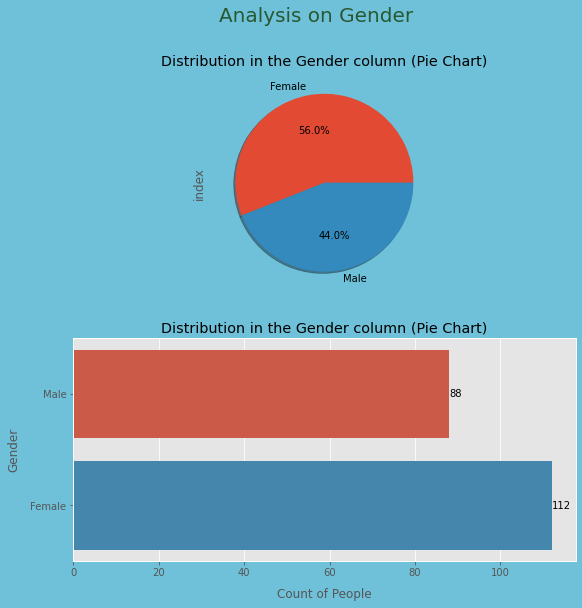

In [10]:
for feature in cat_features:
    catFunc.barPiePlot(feature)

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> For <mark>Gender</mark>, we do see that there the data contians a higher percentage of female as compared to male
  
  <ul><li>From the countplot, we can see hast male contains 88 while female contains 112 in the dataset</li></ul>
  
</ul>
</div>

#### Analysis on numerical data

In [11]:
num_features = [col for col in df.columns if col not in cat_features]
num_features

['CustomerID', 'Age', 'Income (k$)', 'How Much They Spend']

Setting the class function for numerical analysis

In [12]:
class numericAnalyser:
    def __init__(self):
        pass

    def numPlot(self, col):
        fig, ax = plt.subplots(2, 1, figsize=(12, 12))
        fig.suptitle('Analysis on Univaraite data',size=20,color='darkblue')
        fig.set_facecolor('lightgray')
        ax[0].title.set_text(f'Boxplot of {col}')
        ax[1].title.set_text(f'Distribution of {col}')
        sns.boxplot(x=col, data=df,ax=ax[0])
        sns.histplot(x=col,
                     data=df,
                     stat='density',
                     bins=50,
                     kde=True,
                     line_kws={'color': 'red', 'linewidth': 3}, ax=ax[1])
        plt.show()
    def ratio(self,col1,col2,ax):
        ax.hist(df[col1],alpha=0.5,bins=10)
        ax.hist(df[col2],alpha=0.5,bins=10)
        ax.set_title(f'{col1} vs {col2}')
    def numTarget(self,cols):
    # Each columns with respect to target variable
        for i in cols:
            fig, ax = plt.subplots(1, 1, figsize=(12, 6))
            fig.set_facecolor('#5ea886')
            fig.suptitle(f'Analysis on {i}',size=20,color='darkblue')
            sns.boxplot(x=i, y="Gender", data=df, ax=ax)
            plt.show()

numFunc = numericAnalyser()

Running the results


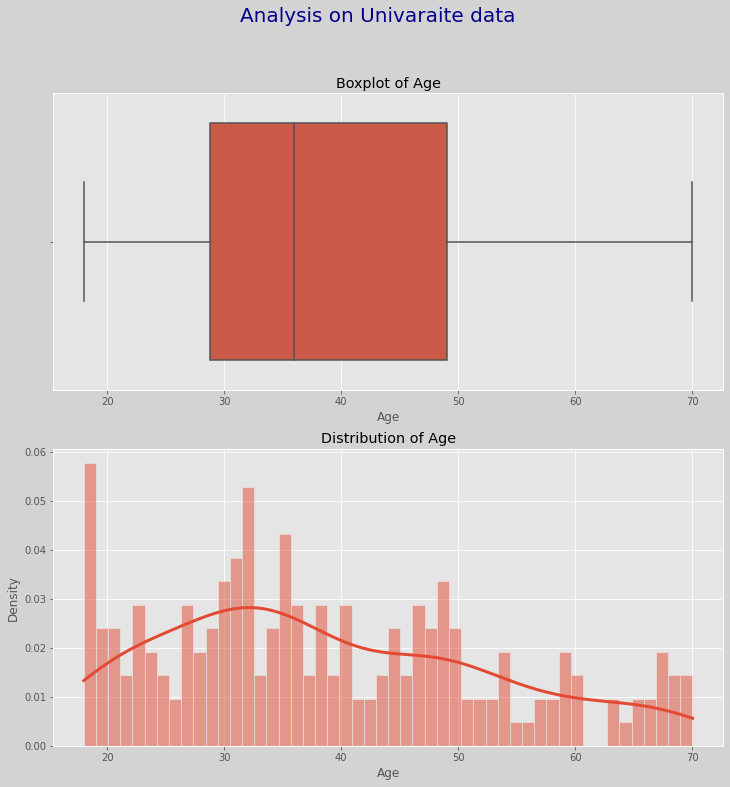

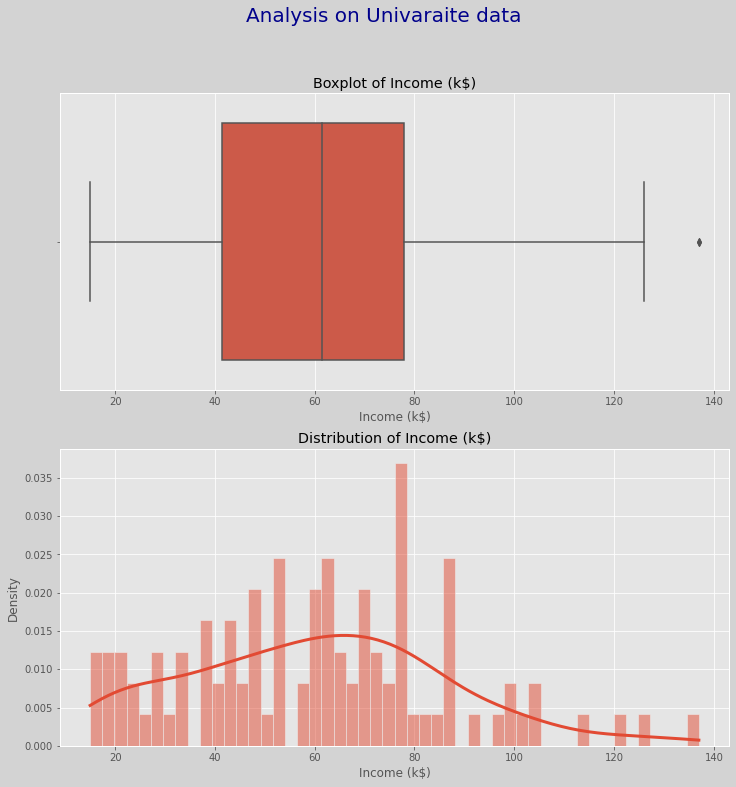

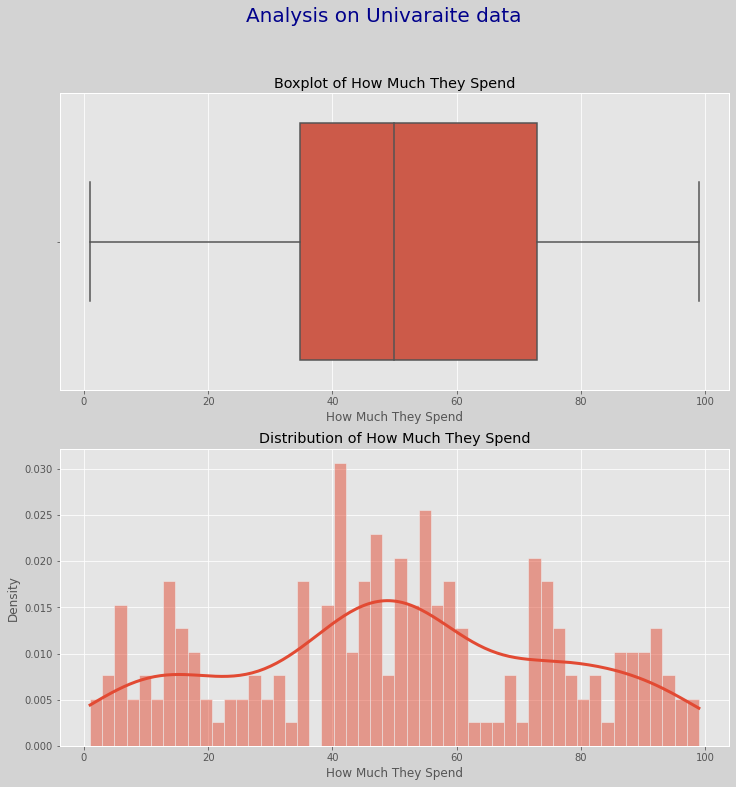

In [13]:
for col in num_features[1:]:
    numFunc.numPlot(col)

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> For <mark>Age</mark>, we do see that there is no outlier. In terms of distribution, Age is postiviely skewed with median at around 35 years old
  
  <ul><li> From the histogram, we can see the same result with a positively skewed data</li></ul>
  
  <li> For <mark>Income</mark>, we do see that there is an outlier. In terms of distribution, Income is negatively skewed with median at around 60000 over the years
  <ul><li> From the histogram, we can see the same result with a negatively skewed data</li></ul>
  <li> For <mark>How Much They Spend</mark>, we do see that there is no outlier. In terms of distribution, How Much They Spend is positively skewed with median at around $50 tons over the years
  <ul><li> From the histogram, we can see the same resul</li></ul>
  
</ul>
</div>

#### Additional analysis on different data with respect to `Gender`

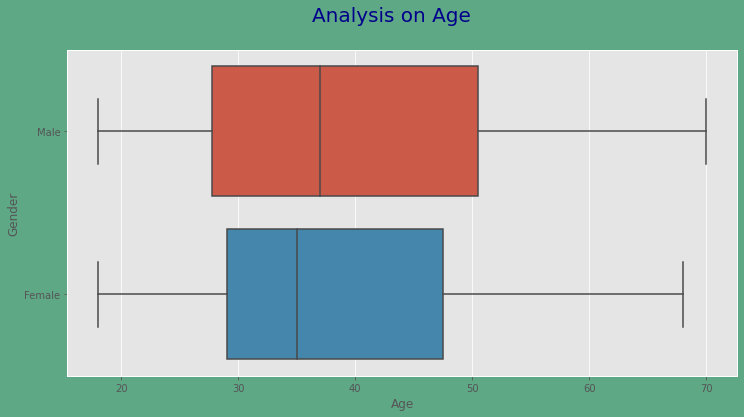

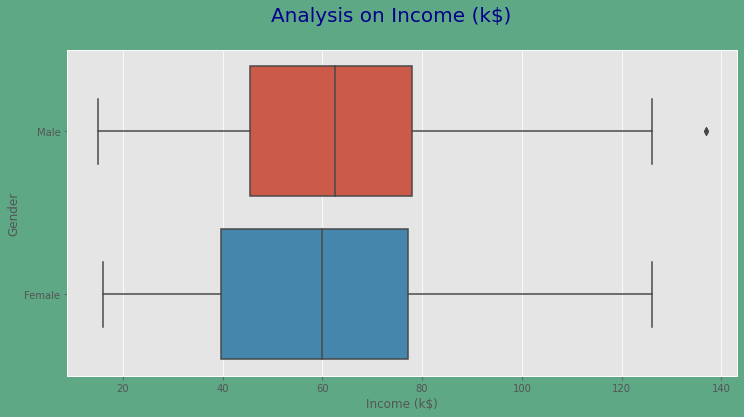

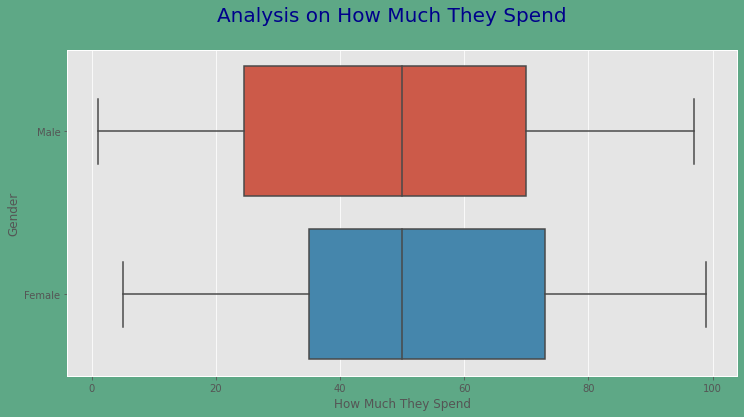

In [14]:
numFunc.numTarget(num_features[1:])

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> For <mark>Age</mark>, male has a wider interquartile range as compared to female, including a higher median as compared to female
  
  <li> For <mark>Income</mark>, male has a smaller interquartile range as compared to female, but a higher median as compared to female
  
  <li> For <mark>How Much the spend</mark>, male has a wider interquartile range as compared to female, including a higher median as compared to female
  
</ul>
</div>

#### Correlation Analysis

Analysis of correlation between numeric columns, even though clustering will not be affected by correlation but it is to further understand the data

Types of Correlation Analysis
1. Pearson
   - $r = \frac{{\sum{{(X - \bar{X})(Y - \bar{Y})}}}}{{\sqrt{{\sum{{(X - \bar{X})^2}} \sum{{(Y - \bar{Y})^2}}}}}}$
   - Measure of linear correlation between two different sets of data

2. Kendall
   -  $
\tau = \frac{{\text{{Number of concordant pairs}} - \text{{Number of discordant pairs}}}}{{\text{{Total number of pairs}}}}
$
   - Measure the strength and direction of association between two different sets of data

3. Spearman
    - $\rho = 1 - \frac{{6 \sum d_i^2}}{{n(n^2 - 1)}} $
    - Allows for correlation between two different sets of data even though the relationship are not linear


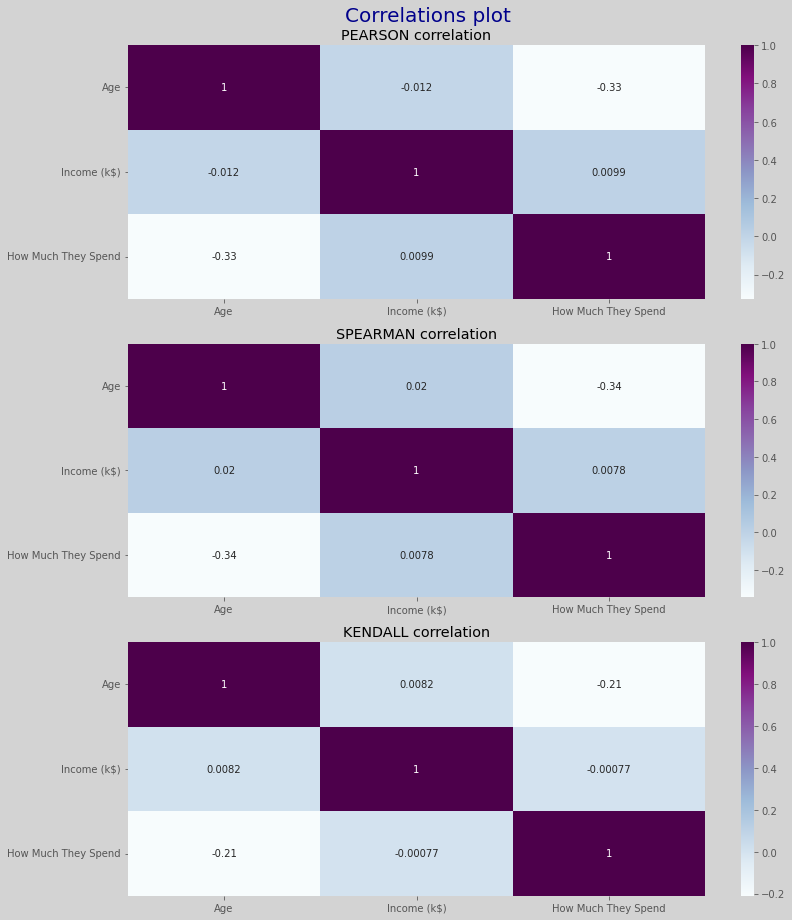

In [15]:
types = ['pearson','spearman','kendall']
fig,ax = plt.subplots(3,1,figsize=(12,13))
fig.suptitle('Correlations plot',size=20,color='darkblue')
fig.set_facecolor('lightgray')
index = 0
for tp in types:
  # Create the graph and dataframe
  ax[index].title.set_text(f'{tp.upper()} correlation')
  ax[index] = sns.heatmap(df[num_features[1:]].corr(method=tp), cmap="BuPu", annot=True,ax=ax[index])
  display(df[num_features[1:]].corr(method = tp).style.bar(color='green'))
  index +=1
plt.tight_layout()
plt.show()


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li>
  There is a weak relationship between age and how much they spend, however, since we want to perform clustering, the data is not affected by collinarity, we can leave it as it is
  </li>
  <li> No significant correlation for others </li>
  

  
</ul>
</div>

#### Additional Statistical Analysis

To determine whether gender plays an effect in the overall mean of the data

Why?
- Gender is a cateogrical variable where it can be 0,1 and with algorithms utilising distance as a form of determining the cluster it can result in inaccurate result

`ANOVA`:
The formula for Analysis of Variance is: ANOVA coefficient, F= Mean sum of squares between the groups (MSB)/ Mean squares of errors (MSE).


| Source of Variation | Sum of Sqaures | Degree of Freedom | Mean Sqaures |
| --- | --- | --- | --- |
| Between Groups | $SS_{Between} = \sum \limits _{i=1} ^{k} n_{i}(\hat{y_{i}} - \hat{y_{.}})^2$ | $df_{Between} = k - 1$| $MS_{Between} = \frac{SS_{Between}}{df_{Between}}$
| Within Groups | $SS_{Within} = \sum \limits _{i=1} ^{k} \sum \limits _{j=1} ^{n_{i}}({y_{ij}} - \hat{y_{i}})^2$ | $df_{Within} = N - k$| $MS_{Within} = \frac{SS"_{Within}}{df_{Within}}$
| Total | $SST = \sum \limits _{i=1} ^{k} \sum \limits _{j=1} ^{n_{i}}({y_{ij}} - \hat{y_{.}})^2$ | $N-1$|


H₀: All Gender have the same mean (Age, Income, Spend)

H₁: The difference in Gender have different mean (Age, Income, Spend)

In [16]:
def plotQQPlot():
    categories = df['Gender'].unique()
    for col in num_features:
        fig, axes = plt.subplots(1, 2, figsize=(10, 8))
        fig.set_facecolor('#86A3CC')
        for ax, cat in zip(axes.flatten(), categories):
            mask = df['Gender'] == cat
            sample = df.loc[mask, col]
            pg.qqplot(sample, ax=ax)
            ax.set_title(f"Q-Q Plot for category {cat}")
            ax.grid(False)

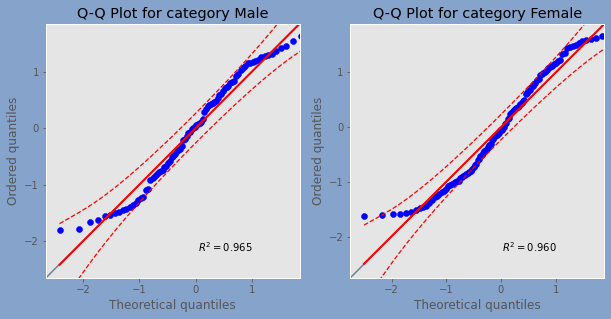

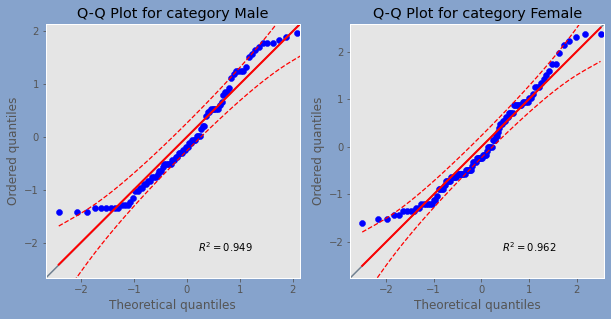

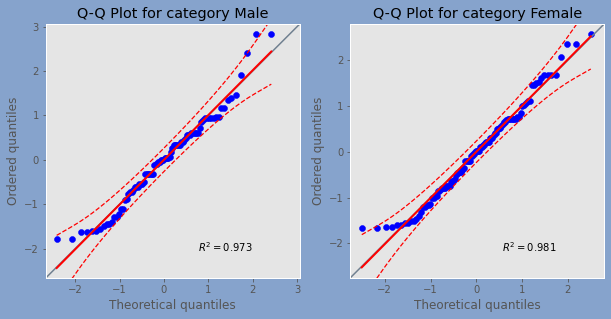

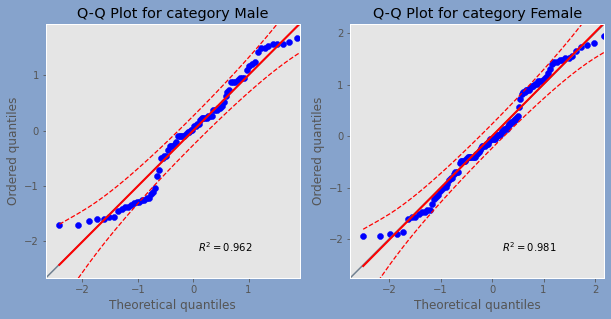

In [17]:
plotQQPlot()

Running the anova test here

In [18]:
categories = df['Gender'].unique()
for col in num_features[1:]:
    df_anova = pg.welch_anova(df[df.columns[1:]], dv = col, between = 'Gender')
    display(df_anova.style.bar(subset = ['p-unc'],color='green'))

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li>With P-Value all above 0.05, hence we can not reject the null hypothesis and therefore it shows us that all gender has equal mean in different column</li>

- __Hence, we can remove gender from the dataframe__
  

  
</ul>
</div>

<a class="anchor" id="6"></a>
## <font color='#71a1e3'>__Feature Engineering__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will feature extract and feature engineer the dataset


\begin{align*}
\text{Difference from Mean} &= Income - Mean(\text{Income})
\end{align*}

\begin{align*}
\text{Score to Age Ratio} &= \frac{\text{Spending Score}}{\text{Age}}
\end{align*}

\begin{align*}
\text{Score to Income Ratio} &= \frac{\text{Spending Score}}{\text{Income}}
\end{align*}


Function for feature extraction here

In [19]:
class FeatureExtraction():
    def __init__(self):
        pass
    def new_features(self):
        df['DifferenceMeanIncome'] = df['Income (k$)'] -  df["Income (k$)"].mean()

        df['ScoreToAge'] =df['How Much They Spend']/ df['Age'] 

        df['ScoreToIncome'] =df['How Much They Spend']/ df['Income (k$)'] 
featureFunc = FeatureExtraction()
featureFunc.new_features()


Look at the new feature extracted dataframe

In [20]:
df

CustomerID  Gender  Age  Income (k$)  How Much They Spend  \
0             1    Male   19           15                   39   
1             2    Male   21           15                   81   
2             3  Female   20           16                    6   
3             4  Female   23           16                   77   
4             5  Female   31           17                   40   
..          ...     ...  ...          ...                  ...   
195         196  Female   35          120                   79   
196         197  Female   45          126                   28   
197         198    Male   32          126                   74   
198         199    Male   32          137                   18   
199         200    Male   30          137                   83   

     DifferenceMeanIncome  ScoreToAge  ScoreToIncome  
0                  -45.56    2.052632       2.600000  
1                  -45.56    3.857143       5.400000  
2                  -44.56    0.300000       0.375000  
3                  -44.56    3.347826       4.812500  
4                  -43.56    1.290323       2.352941  
..                    ...         ...            ...  
195                 59.44    2.257143       0.658333  
196                 65.44    0.622222       0.222222  
197                 65.44    2.312500       0.587302  
198                 76.44    0.562500       0.131387  
199                 76.44    2.766667       0.605839  

[200 rows x 8 columns]

### Standardise the data

As majority of the algorithms are base on the distance between data points , data of similar scale will provide a more reliable result

Hence different standardisation technique can be used
1. Standardisation (Selected)
2. Robust Scaler
3. Min Max Scaler
4. Normalizer

In [21]:
df_standardise = df.drop(['CustomerID','Gender'],axis=1).copy()
df_standardise

Age  Income (k$)  How Much They Spend  DifferenceMeanIncome  ScoreToAge  \
0     19           15                   39                -45.56    2.052632   
1     21           15                   81                -45.56    3.857143   
2     20           16                    6                -44.56    0.300000   
3     23           16                   77                -44.56    3.347826   
4     31           17                   40                -43.56    1.290323   
..   ...          ...                  ...                   ...         ...   
195   35          120                   79                 59.44    2.257143   
196   45          126                   28                 65.44    0.622222   
197   32          126                   74                 65.44    2.312500   
198   32          137                   18                 76.44    0.562500   
199   30          137                   83                 76.44    2.766667   

     ScoreToIncome  
0         2.600000  
1         5.400000  
2         0.375000  
3         4.812500  
4         2.352941  
..             ...  
195       0.658333  
196       0.222222  
197       0.587302  
198       0.131387  
199       0.605839  

[200 rows x 6 columns]

#### Standard Scaler

In [22]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income (k$)', 'How Much They Spend',
       'DifferenceMeanIncome', 'ScoreToAge', 'ScoreToIncome'],
      dtype='object')

In [23]:
standard_scaler = StandardScaler()
df_scale = pd.DataFrame(standard_scaler.fit_transform(df_standardise), columns = df.columns[2:])
df_scale

Age  Income (k$)  How Much They Spend  DifferenceMeanIncome  \
0   -1.424569    -1.738999            -0.434801             -1.738999   
1   -1.281035    -1.738999             1.195704             -1.738999   
2   -1.352802    -1.700830            -1.715913             -1.700830   
3   -1.137502    -1.700830             1.040418             -1.700830   
4   -0.563369    -1.662660            -0.395980             -1.662660   
..        ...          ...                  ...                   ...   
195 -0.276302     2.268791             1.118061              2.268791   
196  0.441365     2.497807            -0.861839              2.497807   
197 -0.491602     2.497807             0.923953              2.497807   
198 -0.491602     2.917671            -1.250054              2.917671   
199 -0.635135     2.917671             1.273347              2.917671   

     ScoreToAge  ScoreToIncome  
0      0.462898       1.577244  
1      2.136786       4.460960  
2     -1.162866      -0.714279  
3      1.664337       3.855894  
4     -0.244230       1.322799  
..          ...            ...  
195    0.652605      -0.422475  
196   -0.863968      -0.871625  
197    0.703955      -0.495630  
198   -0.919368      -0.965176  
199    1.125246      -0.476538  

[200 rows x 6 columns]

Visualise the result

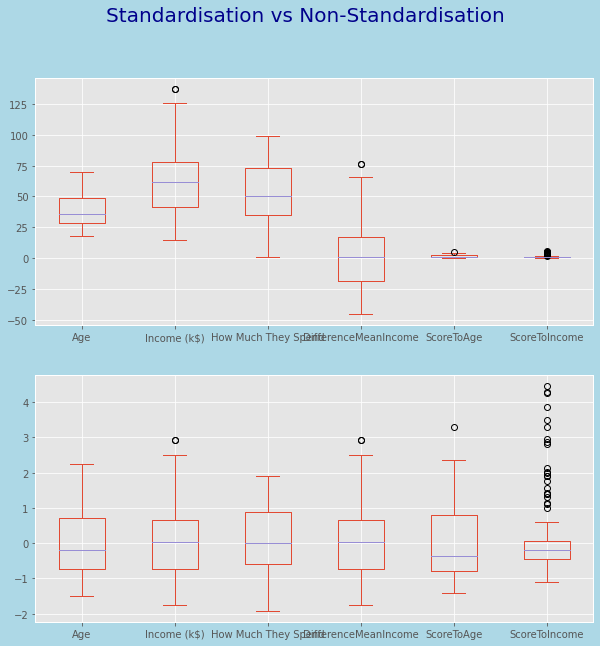

In [24]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
fig.suptitle('Standardisation vs Non-Standardisation',size=20,color='darkblue')
df[df.columns[2:]].plot.box(ax=ax[0])
df_scale.plot.box(ax = ax[1])
fig.set_facecolor('lightblue')
plt.show()

<a class="anchor" id="7"></a>
## <font color='#71a1e3'>__Data Preprocessing__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here, we will process the data

#### Rename the How Much the spend column

In [25]:
df = df.rename(columns={'How Much They Spend': 'Spending Score'})
df

CustomerID  Gender  Age  Income (k$)  Spending Score  \
0             1    Male   19           15              39   
1             2    Male   21           15              81   
2             3  Female   20           16               6   
3             4  Female   23           16              77   
4             5  Female   31           17              40   
..          ...     ...  ...          ...             ...   
195         196  Female   35          120              79   
196         197  Female   45          126              28   
197         198    Male   32          126              74   
198         199    Male   32          137              18   
199         200    Male   30          137              83   

     DifferenceMeanIncome  ScoreToAge  ScoreToIncome  
0                  -45.56    2.052632       2.600000  
1                  -45.56    3.857143       5.400000  
2                  -44.56    0.300000       0.375000  
3                  -44.56    3.347826       4.812500  
4                  -43.56    1.290323       2.352941  
..                    ...         ...            ...  
195                 59.44    2.257143       0.658333  
196                 65.44    0.622222       0.222222  
197                 65.44    2.312500       0.587302  
198                 76.44    0.562500       0.131387  
199                 76.44    2.766667       0.605839  

[200 rows x 8 columns]

#### Drop the customer ID columns

In [26]:
df = df.drop('CustomerID',axis=1)
df

Gender  Age  Income (k$)  Spending Score  DifferenceMeanIncome  \
0      Male   19           15              39                -45.56   
1      Male   21           15              81                -45.56   
2    Female   20           16               6                -44.56   
3    Female   23           16              77                -44.56   
4    Female   31           17              40                -43.56   
..      ...  ...          ...             ...                   ...   
195  Female   35          120              79                 59.44   
196  Female   45          126              28                 65.44   
197    Male   32          126              74                 65.44   
198    Male   32          137              18                 76.44   
199    Male   30          137              83                 76.44   

     ScoreToAge  ScoreToIncome  
0      2.052632       2.600000  
1      3.857143       5.400000  
2      0.300000       0.375000  
3      3.347826       4.812500  
4      1.290323       2.352941  
..          ...            ...  
195    2.257143       0.658333  
196    0.622222       0.222222  
197    2.312500       0.587302  
198    0.562500       0.131387  
199    2.766667       0.605839  

[200 rows x 7 columns]

#### Encoding

1. One Hot encoding
2. Label encoder
3. Ordinal Encoder
4. Custom Encoding

Here we will encode those that are for ordinal encoding
- Gender

In [27]:
oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df[['Gender']])
df

Gender  Age  Income (k$)  Spending Score  DifferenceMeanIncome  \
0       1.0   19           15              39                -45.56   
1       1.0   21           15              81                -45.56   
2       0.0   20           16               6                -44.56   
3       0.0   23           16              77                -44.56   
4       0.0   31           17              40                -43.56   
..      ...  ...          ...             ...                   ...   
195     0.0   35          120              79                 59.44   
196     0.0   45          126              28                 65.44   
197     1.0   32          126              74                 65.44   
198     1.0   32          137              18                 76.44   
199     1.0   30          137              83                 76.44   

     ScoreToAge  ScoreToIncome  
0      2.052632       2.600000  
1      3.857143       5.400000  
2      0.300000       0.375000  
3      3.347826       4.812500  
4      1.290323       2.352941  
..          ...            ...  
195    2.257143       0.658333  
196    0.622222       0.222222  
197    2.312500       0.587302  
198    0.562500       0.131387  
199    2.766667       0.605839  

[200 rows x 7 columns]

In [28]:
df = df.drop('Gender',axis=1)

#### Setting the original dataframe for baseline model

In [29]:
df_process = df[['Age','Income (k$)','Spending Score']]
df_process

Age  Income (k$)  Spending Score
0     19           15              39
1     21           15              81
2     20           16               6
3     23           16              77
4     31           17              40
..   ...          ...             ...
195   35          120              79
196   45          126              28
197   32          126              74
198   32          137              18
199   30          137              83

[200 rows x 3 columns]

<a class="anchor" id="8"></a>
## <font color='#71a1e3'>__Evaluation Metric__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will set the scores evaluation metric

1. __Silhouette Coefficient__
  $$s(i) = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}$$
   - Metric used to calculate the how good a clustering technique is
   - Ranges from -1 to 1
     - 1: Means clusters are well apart from each other and clearly distinguished.
     - 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant\
     - 1: Means clusters are assigned in the wrong way
1. __Calinski harabasz score__
  $$CH(k) = \frac{B_k / (k-1)}{W_k / (N-k)}$$
     - $B_k$: between-group sum of squares (between-group dispersion)
     - $W_k$ : within-group sum of squares (within-group dispersion)
     - $N$ : total number of observations
     - $k$ : total number of clusters
   - Also known as the __Variance Ratio Criterion__
     - Calculated as a ratio of sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all cluster
     - The higher the score, the better the cluster it is
1. __Davies Bouldin Score__
   $$DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{i≠j} (R_{ij})$$
     - Average of the similarity measures of each cluster with a cluster most simiar to it
   - Calculated as the average similarity of each cluster with a cluster most similar to it
   - The lower the score, the better the clusters are separated and the better is the result of the clustering performed

In [30]:
evaluation = [
    ('silhouette_score', silhouette_score),
    ('calinski_harabasz_score',calinski_harabasz_score),
    ('davies_bouldin_score',davies_bouldin_score)
]

def compute_score(evaluation,labels):
    scores = pd.DataFrame(columns=[i for i,h in evaluation ])
    score_dict = {}
    for i,j in evaluation:
        score = (j(df, labels))
        score_dict[i] = score
    scores = scores.append(score_dict, ignore_index=True)
    display(scores.style.bar( color='green'))
    return scores

<a class="anchor" id="9"></a>
## <font color='#71a1e3'>__Model Selected__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here, we will describe the different models selected

1. __Kmeans Clustering__ (Selected)
   - Number of cluster is predefined
   - It will first set the centroid by shuffling the dataset and randomly selecting K data points for centroids without replacement
   - Continue iteration until there is no change in centroids

2. __Agglomerative Clustering (Hierarchical)__ (Selected)
   - Bottom up approach which starts with many small clusters and merge them together to create bigger clusters
   - Utlilise dendrograms to visualise the history of groups and figure out the optimal number of clusters
   - Different types 
     - Single 
       1. Tweak certain parameters to get drastically different results
       2. Take the two closest cluster and make them one cluster 
     - Complete
        1. Two clusters is the longest distance between two points in each cluster
     - Average
       1. Distance between two clusters the shortest distancce between two points in each cluster  
     - Ward
       1.  Distance between clusters is the sum of sqaured differences within all clusters
  
3. __Density-based spatial clustering of applications with noise (DBSCAN)__ (Selected)
    - Groups ‘densely grouped’ data points into a single cluster and can identify clusters in large spatial datasets by looking at the local density of the data point
    - Requires two different parameters epsilon, min points 
    - Create a circle of epsilon radius around every data point and classifies them into core point, border point, noise

4. __Gaussian Mixture Model__ (Selected)
    - Function that comprised of several Gaussians
    - Contains the parameters such as mean, covarince and mixing probability that defines how big the Gaussian function will be
  
5. __Balance Iterative Reducing and Clustering using Hierarchies (BIRCH)__ (Selected)
    - Deals with large dataset
    - Generates a more compact summary that retains as much distribution as possible
    - Contains the following parameters such as threshold, branching factor and n clusters

6. __Affinity Propagation__
   - Each data points provides a message to all other points, informing the target of each target relative attractiveness to the sender, which they then responds to all senders with a reply informing each sender of its availability 
   - Well suited for problems where we do know the optimal number 

7. __Mean-Shift__
    - It works by iterating over all the data points and then shift them towards the mode
    - Similar to BIRCH

8. __Ordering Points to Identify the Clustering Structure (OPTICS)__
   - Density based algorithms 
   - Builds a density-based representation of the data by creating an ordered list of points called the reachability plot
   - Contains parameter epsilon

<a class="anchor" id="10"></a>
## <font color='#71a1e3'>__Baseline Model__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here, we will start with the baseline model

Below is the class function for the baseline model

Credits to [https://plotly.com/python/3d-subplots/]

In [31]:
def average_line_plot(fig, avg_silhouette):
    average_line = go.Scatter(x=[avg_silhouette] * 500, y=np.arange(500), showlegend=False,
                        mode='lines', line=dict(color='red', dash='dash', width=1), fill='tozeroy')
    fig.append_trace(average_line, 1, 1)
    return fig

def filled_area_plot(fig, cluster_labels, sample_silhouette_values, colors):
    y_lower = 10
    for i in range(1, len(np.unique(cluster_labels)) + 1):
        cluster_silhouettes = sample_silhouette_values[cluster_labels == i]
        cluster_silhouettes.sort()
        y_upper = y_lower + cluster_silhouettes.shape[0]
        c = f'rgb({colors[i-1][0] * 255}, {colors[i-1][1] * 255}, {colors[i-1][2] * 255})'
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper), x=cluster_silhouettes,
                                mode='lines', showlegend=False, line=dict(width=0.5, color=c), fill='tozerox')
        y_lower = y_upper + 10
        fig.append_trace(filled_area, 1, 1)
    return fig

def scatter_plots(fig, df, cluster_labels, cluster_centroids):
    colors = sns.color_palette('Paired')
    cmap = dict(zip(np.sort(np.unique(cluster_labels)), colors))
    scatter = go.Scatter3d(x=df['Age'], y=df['Income (k$)'], z=df['Spending Score'], mode='markers', marker=dict(
        color=list(map(lambda x: tuple(np.array(cmap[x]) * 255), cluster_labels))))
    fig.append_trace(go.Scatter3d(x=cluster_centroids['Age'], y=cluster_centroids['Income (k$)'],
                                z=cluster_centroids['Spending Score'], mode='markers', marker=dict(symbol='diamond', color='black')), 2, 1)
    fig.append_trace(scatter, 2, 1)
    return fig

class Clustering:
    def __init__(self):
        pass

    def clustering_plot(self, cluster_labels, df,types, evaluation):
        colors = sns.color_palette('Paired')
        n_clusters = len(np.unique(cluster_labels))
        cluster_centroids = df.groupby(cluster_labels).mean()
        scores = compute_score(evaluation,cluster_labels)
        avg_silhouette = scores['silhouette_score'].mean()
        print(f"For {colored(n_clusters,'green')} {colored('clusters','green')}, Mean Silhouette Score :{colored(avg_silhouette, 'green')}")

        sample_silhouette_values = silhouette_samples(df, cluster_labels)
        fig = make_subplots(rows=2, cols=1, print_grid=False, subplot_titles=(
            'Silhouette Scores', 'Clustering Plot (Baseline)'), specs=[[{'type': 'xy'}], [{'type': 'scene'}]])
        fig['layout']['xaxis1'].update(title='Silhouette Coefficient')
        fig['layout']['yaxis1'].update(title='Cluster Label', showticklabels=False, range=[
                                    0, len(df) + (n_clusters + 1) * 10])
        fig.update_scenes(
            dict(xaxis_title='Age', yaxis_title='Income (k$)', zaxis_title='Spending Score'))
        fig.update_layout(title_text=f"{types} Baseline",height=800, width=600,template='seaborn',
                        scene=dict(bgcolor='rgba(0,0,0,0)',
                                    xaxis=dict(backgroundcolor='rgb(17,17,17)'),
                                    yaxis=dict(backgroundcolor='rgb(17,17,17)'),
                                    zaxis=dict(backgroundcolor='rgb(17,17,17)'))
        )

        fig = filled_area_plot(fig, cluster_labels, sample_silhouette_values, colors)
        fig = average_line_plot(fig, avg_silhouette)
        fig = scatter_plots(fig, df, cluster_labels, cluster_centroids)
        fig.show(render='colab')
        return fig, avg_silhouette,scores
    def heatmap(self,centers,model,type):
        fig,ax = plt.subplots(1,1,figsize=(12,8))
        fig.set_facecolor('lightblue')
        fig.suptitle(f'{model} {type} clustering')
        sns.heatmap(centers,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)
        plt.show()

clusteringFunc = Clustering()


<a class="anchor" id="11"></a>
## <font color='#71a1e3'>__Process (Baseline Model)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here, we will start with the baseline model

Function for the full process

In [32]:
def full_process(model,model_name,n:int):
    df_model = df_process.copy()
    cluster_labels = model.fit_predict(df_process) + n
    if model_name == 'DBSCAN' or model_name == 'MeanShift':
        df_model['ClusterGroup'] = cluster_labels 
        df_model['ClusterGroup'] = df_model['ClusterGroup'].replace({-1:'Noise'})
        display(df_model)
        fig, score,overall = clusteringFunc.clustering_plot(cluster_labels, df_model.drop('ClusterGroup',axis=1),model_name,evaluation)
    else: 
        df_model['ClusterGroup'] = cluster_labels
        display(df_model)
        fig, score,overall = clusteringFunc.clustering_plot(df_model['ClusterGroup'], df_model,model_name,evaluation)

    return fig,score,df_model,overall

overall_score_baseline = pd.DataFrame()

### KMeans

In [33]:
model = KMeans()
kmeans_processed = (full_process(model, 'KMeans', 1))
new_row = {'Type': 'KMeans', "silhouette_score": kmeans_processed[3]['silhouette_score'].values[0], 'calinski_harabasz_score':
           kmeans_processed[3]['calinski_harabasz_score'].values[0], 'davies_bouldin_score': kmeans_processed[3]['davies_bouldin_score'].values[0]}
overall_score_baseline = overall_score_baseline.append(new_row, ignore_index=True)
overall_score_baseline

Age  Income (k$)  Spending Score  ClusterGroup
0     19           15              39             5
1     21           15              81             7
2     20           16               6             5
3     23           16              77             7
4     31           17              40             5
..   ...          ...             ...           ...
195   35          120              79             2
196   45          126              28             8
197   32          126              74             2
198   32          137              18             8
199   30          137              83             2

[200 rows x 4 columns]

For 8 clusters, Mean Silhouette Score :0.43514232001970526


Type  silhouette_score  calinski_harabasz_score  davies_bouldin_score
0  KMeans          0.435142               180.327401               0.81292

Retrieve the clustering centre

In [34]:
df_kmeans = kmeans_processed[2]
centers = df_kmeans.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_kmeans['ClusterGroup']).value_counts() / len(df_kmeans['ClusterGroup']) * 100

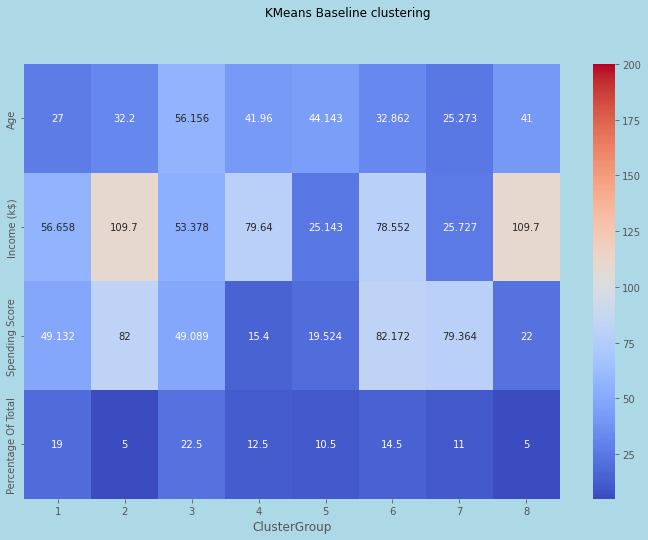

In [35]:
clusteringFunc.heatmap(centers.T,'KMeans','Baseline')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the clustering plot,
- Too many clusters 
- Size of clusters varies alot, with yellow being extremely small with some data point being close to each other
- Recommends 8 clusters
- The evaluation metric shows  0.435357,	156.160983,	0.802340
  respectively

From the heatmap,
- Cluster group 19 has the highest percentage at 19%
- Cluster group 7 and 8 are the smallest
</div>



#### Agglomerative Clustering (Hierarchical)

In [36]:
model = AgglomerativeClustering()
hie_processed = (full_process(model,'Hierarchical',1))
new_row = {'Type': 'Agglomerative', "silhouette_score": hie_processed[3]['silhouette_score'].values[0], 'calinski_harabasz_score':
           hie_processed[3]['calinski_harabasz_score'].values[0], 'davies_bouldin_score': hie_processed[3]['davies_bouldin_score'].values[0]}
overall_score_baseline = overall_score_baseline.append(new_row, ignore_index=True)
overall_score_baseline

Age  Income (k$)  Spending Score  ClusterGroup
0     19           15              39             2
1     21           15              81             2
2     20           16               6             2
3     23           16              77             2
4     31           17              40             2
..   ...          ...             ...           ...
195   35          120              79             1
196   45          126              28             1
197   32          126              74             1
198   32          137              18             1
199   30          137              83             1

[200 rows x 4 columns]

For 2 clusters, Mean Silhouette Score :0.35158773310705543


Type  silhouette_score  calinski_harabasz_score  \
0         KMeans          0.435142               180.327401   
1  Agglomerative          0.351588               120.679483   

   davies_bouldin_score  
0              0.812920  
1              1.186976

Retrieve the clustering centre

In [37]:
df_hie = hie_processed[2]
centers = df_hie.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_hie['ClusterGroup']).value_counts() / len(df_hie['ClusterGroup']) * 100

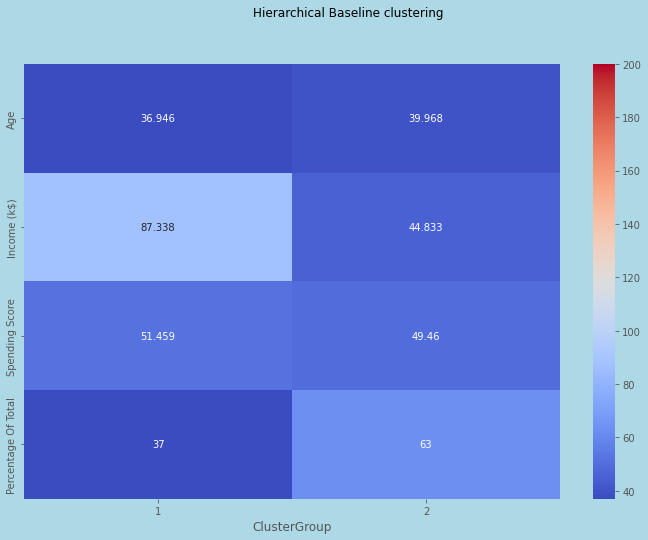

In [38]:
clusteringFunc.heatmap(centers.T,'Hierarchical','Baseline')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the clustering plot,
- Two clusters 
- Separated base on their income
- Others age, spending score did not come into play
-  The evaluation metric shows  0.0.351588,	120.74,	1.19
  respectively

From the heatmap,
- Cluster group 2 has the higher percentage at 63%
</div>



### DBSCAN

Randomly set the eps to 5

In [39]:
model = DBSCAN(eps=5)
dbscan_processed = (full_process(model,'DBSCAN',2))
new_row = {'Type': 'DBSCAN', "silhouette_score": dbscan_processed[3]['silhouette_score'].values[0], 'calinski_harabasz_score':
           dbscan_processed[3]['calinski_harabasz_score'].values[0], 'davies_bouldin_score': dbscan_processed[3]['davies_bouldin_score'].values[0]}
overall_score_baseline = overall_score_baseline.append(new_row, ignore_index=True)
overall_score_baseline

Age  Income (k$)  Spending Score  ClusterGroup
0     19           15              39             1
1     21           15              81             2
2     20           16               6             1
3     23           16              77             2
4     31           17              40             1
..   ...          ...             ...           ...
195   35          120              79             1
196   45          126              28             1
197   32          126              74             1
198   32          137              18             1
199   30          137              83             1

[200 rows x 4 columns]

For 5 clusters, Mean Silhouette Score :-0.3684040508993671


Type  silhouette_score  calinski_harabasz_score  \
0         KMeans          0.435142               180.327401   
1  Agglomerative          0.351588               120.679483   
2         DBSCAN         -0.368404                 3.870599   

   davies_bouldin_score  
0              0.812920  
1              1.186976  
2              2.862642

Retrive the center

In [40]:
df_dbscan = dbscan_processed[2]
centers = df_dbscan.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_dbscan['ClusterGroup']).value_counts() / len(df_dbscan['ClusterGroup']) * 100

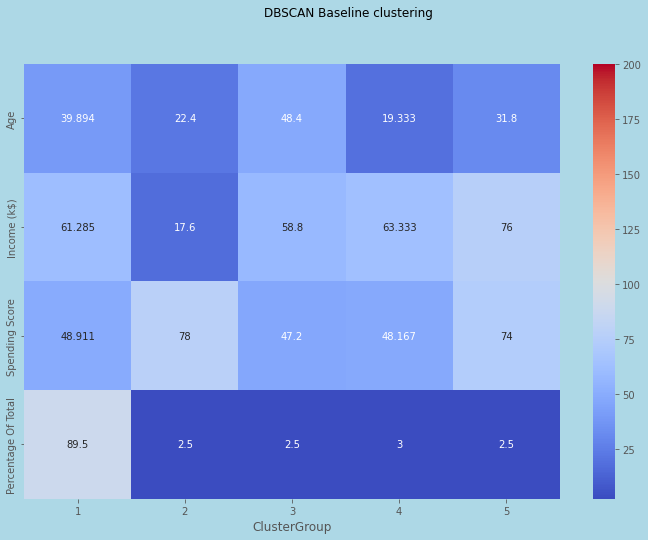

In [41]:
clusteringFunc.heatmap(centers.T,'DBSCAN','Baseline')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the clustering plot,
- 5 clusters 
- Clusters are not split evenly
- No clear split
- The evaluation metric shows  -0.365931	4.066263	2.335267
  respectively

From the heatmap,
- Cluster group 1 has the higher percentage at 89.5%
</div>



### Gaussian Mixture

Setting the initial n_components value to 3

In [42]:
model = GaussianMixture(n_components=3)
df_gm_processed = (full_process(model,'Gaussian Mixture',2))
new_row = {'Type': 'GMM', "silhouette_score": df_gm_processed[3]['silhouette_score'].values[0], 'calinski_harabasz_score':
           df_gm_processed[3]['calinski_harabasz_score'].values[0], 'davies_bouldin_score': df_gm_processed[3]['davies_bouldin_score'].values[0]}
overall_score_baseline = overall_score_baseline.append(new_row, ignore_index=True)
overall_score_baseline

Age  Income (k$)  Spending Score  ClusterGroup
0     19           15              39             2
1     21           15              81             2
2     20           16               6             2
3     23           16              77             2
4     31           17              40             2
..   ...          ...             ...           ...
195   35          120              79             3
196   45          126              28             4
197   32          126              74             3
198   32          137              18             4
199   30          137              83             3

[200 rows x 4 columns]

For 3 clusters, Mean Silhouette Score :0.40372143523444864


Type  silhouette_score  calinski_harabasz_score  \
0         KMeans          0.435142               180.327401   
1  Agglomerative          0.351588               120.679483   
2         DBSCAN         -0.368404                 3.870599   
3            GMM          0.403721               116.755249   

   davies_bouldin_score  
0              0.812920  
1              1.186976  
2              2.862642  
3              0.790719

Retrieve the cluster center centroid

In [43]:
df_gm = df_gm_processed[2]
centers = df_gm.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_gm['ClusterGroup']).value_counts() / len(df_gm['ClusterGroup']) * 100

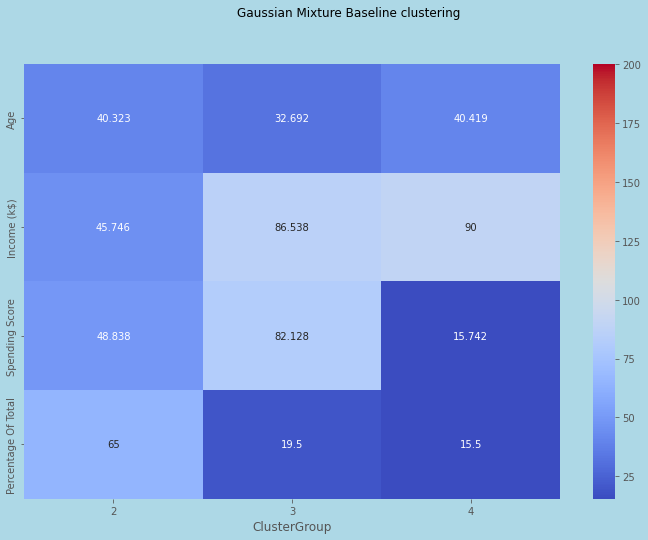

In [44]:
clusteringFunc.heatmap(centers.T,'Gaussian Mixture','Baseline')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the clustering plot,
- 3 clusters 
- Clusters are not split evenly
- Some data points overlap with any cluster
- The evaluation metric shows  0.369166	99.617303	0.861701
  respectively

From the heatmap,
- Cluster group 1 has the higher percentage at 54.5%, and split by the three different features
</div>



### BIRCH

In [45]:
model = Birch()
birch_processed = (full_process(model,'Birch',2))
new_row = {'Type': 'BIRCH', "silhouette_score": birch_processed[3]['silhouette_score'].values[0], 'calinski_harabasz_score':
           birch_processed[3]['calinski_harabasz_score'].values[0], 'davies_bouldin_score': birch_processed[3]['davies_bouldin_score'].values[0]}
overall_score_baseline = overall_score_baseline.append(new_row, ignore_index=True)
overall_score_baseline

Age  Income (k$)  Spending Score  ClusterGroup
0     19           15              39             2
1     21           15              81             2
2     20           16               6             2
3     23           16              77             2
4     31           17              40             2
..   ...          ...             ...           ...
195   35          120              79             4
196   45          126              28             3
197   32          126              74             4
198   32          137              18             3
199   30          137              83             4

[200 rows x 4 columns]

For 3 clusters, Mean Silhouette Score :0.416043948495533


Type  silhouette_score  calinski_harabasz_score  \
0         KMeans          0.435142               180.327401   
1  Agglomerative          0.351588               120.679483   
2         DBSCAN         -0.368404                 3.870599   
3            GMM          0.403721               116.755249   
4          BIRCH          0.416044               127.123099   

   davies_bouldin_score  
0              0.812920  
1              1.186976  
2              2.862642  
3              0.790719  
4              0.799588

Getting the cluster centroids

In [46]:
df_birch = birch_processed[2]
centers = df_birch.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_birch['ClusterGroup']).value_counts() / len(df_birch['ClusterGroup']) * 100

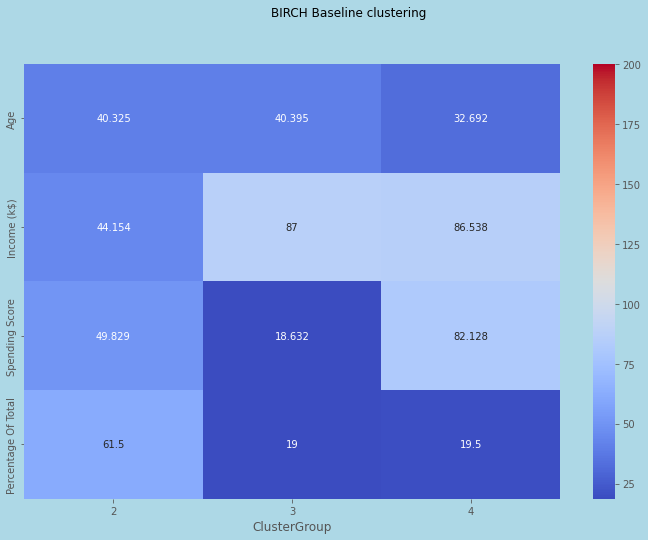

In [47]:
clusteringFunc.heatmap(centers.T,'BIRCH','Baseline')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the clustering plot,
- 3 clusters 
- Clusters are not split evenly
-  The evaluation metric shows  0.379548	107.639942	0.878509
  respectively

From the heatmap,
- Cluster group 1 has the higher percentage at 61.5%, and split by the three different features
</div>



#### Analysis of baseline models result

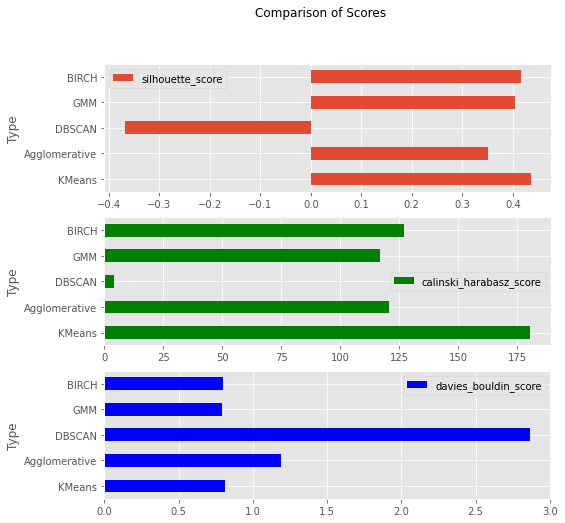

In [48]:
fig,ax = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('Comparison of Scores')
overall_score_baseline[['Type','silhouette_score']].plot.barh(x = 'Type',ax=ax[0])
overall_score_baseline[['Type','calinski_harabasz_score']].plot.barh(x = 'Type',ax=ax[1],color='green')
overall_score_baseline[['Type','davies_bouldin_score']].plot.barh(x = 'Type',ax=ax[2],color='blue')
plt.show()

__Overall, with the evaluation metric being low and the clusters shown on all plots are not evenly split__

<a class="anchor" id="12"></a>
## <font color='#71a1e3'>__Dimensionality Reduction__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here, with 6 features, we will utilise dimension reduction method here

`High dimensional data` means a dataset has a lot of features.
Generally, we do not want to feed a large number of features directly into a machine learning algorithm since some features may be irrelevant

From the previous different clustering idea, we can see that the clustering group is hard to determine and the silhouette score is extremely low

There are many methods to reduce the dimension of a dataset.

1. PCA
2. T-SNE
3. ISOMAP

Below I will be utlising each technique

Standardise the data for second models first

In [49]:
standard_scaler = StandardScaler()
df_scale = pd.DataFrame(standard_scaler.fit_transform(df), columns = df.columns)
df_scale

Age  Income (k$)  Spending Score  DifferenceMeanIncome  ScoreToAge  \
0   -1.424569    -1.738999       -0.434801             -1.738999    0.462898   
1   -1.281035    -1.738999        1.195704             -1.738999    2.136786   
2   -1.352802    -1.700830       -1.715913             -1.700830   -1.162866   
3   -1.137502    -1.700830        1.040418             -1.700830    1.664337   
4   -0.563369    -1.662660       -0.395980             -1.662660   -0.244230   
..        ...          ...             ...                   ...         ...   
195 -0.276302     2.268791        1.118061              2.268791    0.652605   
196  0.441365     2.497807       -0.861839              2.497807   -0.863968   
197 -0.491602     2.497807        0.923953              2.497807    0.703955   
198 -0.491602     2.917671       -1.250054              2.917671   -0.919368   
199 -0.635135     2.917671        1.273347              2.917671    1.125246   

     ScoreToIncome  
0         1.577244  
1         4.460960  
2        -0.714279  
3         3.855894  
4         1.322799  
..             ...  
195      -0.422475  
196      -0.871625  
197      -0.495630  
198      -0.965176  
199      -0.476538  

[200 rows x 6 columns]

###  Principal Component Analysis

It is a popular technique to reduce dataset with high number of dimensions per observations, making the data more interpretable while preserving the maximum amount of information. It i sa statistical technique for reducing the dimensionality of a dataset

It finds a subspace that most preserves the data variance, with the subspace defined by the dominant eigenvectors of the data’s covariance matrix

Credits to [MAI Practicals]

In [50]:
def pca_results(data, pca):
    
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions
    
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions

    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [51]:
pca = PCA().fit(df_scale)
pca_results = pca_results(df_scale, pca)
pca_results.style.bar(color='green')

#### Analysing Scree plot

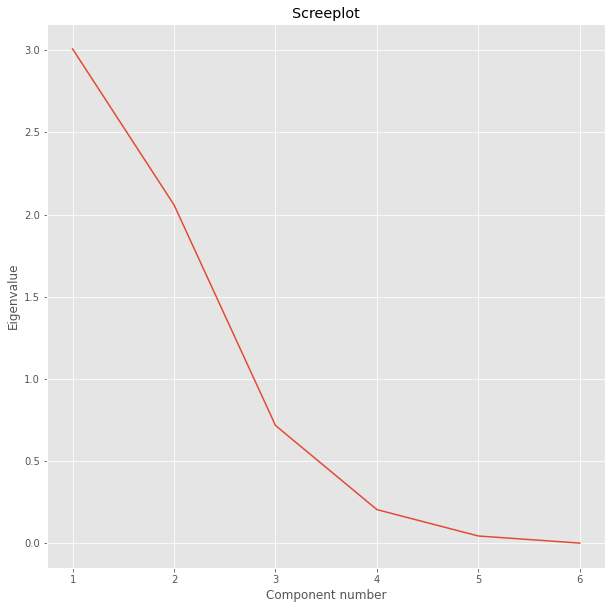

In [52]:
import matplotlib.ticker as ticker
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the scree plot and cumulative variance, 
- 2 PC can be extracted with an explained variance of 84%
</div>



Retrieve the 2 PCs


In [53]:
pca = PCA(n_components=2).fit(df)
pca_final = pca.transform(df)
df_pca = pd.DataFrame(pca_final, columns=["PC1", "PC2"])
df_pca


PC1        PC2
0    -64.463561   5.317362
1    -63.932395 -35.182729
2    -63.483282  37.763980
3    -62.578409 -30.781209
4    -61.697460   7.179962
..          ...        ...
195   84.476357 -27.655469
196   92.185716  24.418135
197   92.910609 -23.359491
198  107.687227  31.384916
199  108.601999 -32.355559

[200 rows x 2 columns]

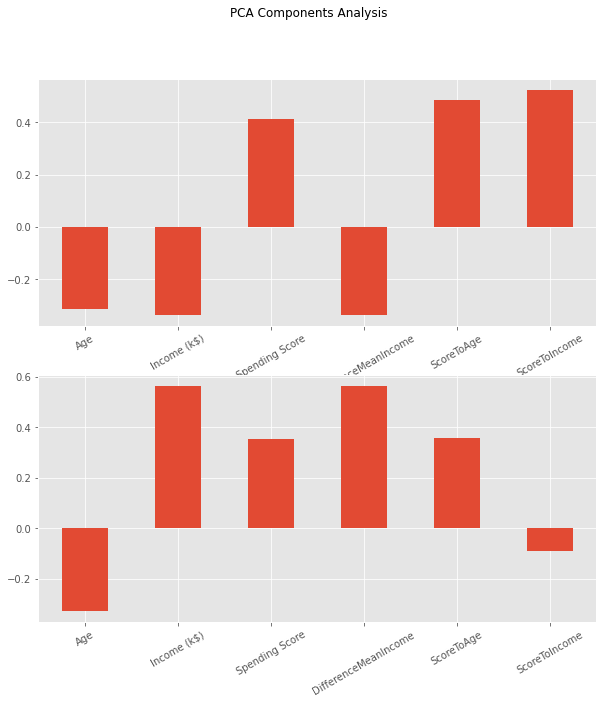

In [54]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
for index in range(0,2):
    pca_results.iloc[index,3:].plot.bar(rot=30,ax=ax[index])
fig.suptitle('PCA Components Analysis')
plt.show()

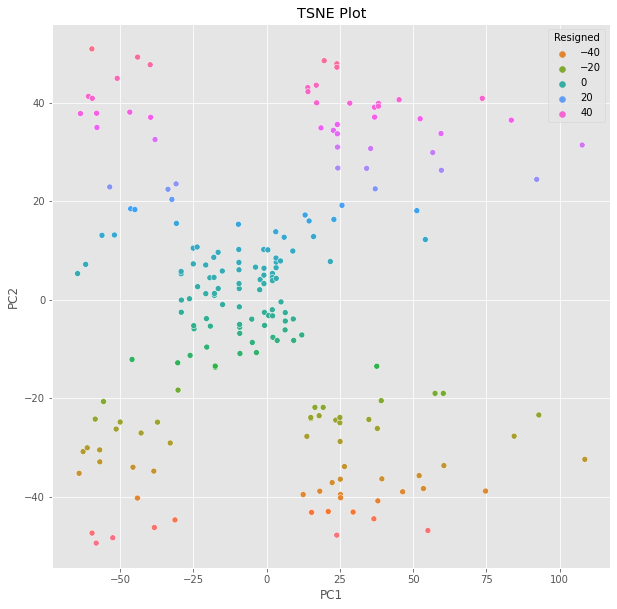

In [55]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 10))
df_pca = df_pca.copy()
df_pca["Resigned"] = df_pca.iloc[:, -1]
plt.title('TSNE Plot')
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_pca.iloc[:, -1],palette="husl")
plt.show()


### Implement gover distance for all data for ISOMAP and TSNE

Gower distance is a metric that measures the dissimilarity of two items with mixed numeric and non-numeric data

Credits to [https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553]

In [56]:
from gower import gower_matrix
df_scale2 = pd.DataFrame(gower_matrix(df_scale))
df_scale2

0         1         2         3         4         5         6    \
0    0.000000  0.223620  0.188351  0.191087  0.078260  0.181834  0.247396   
1    0.223620  0.000000  0.405560  0.050818  0.285658  0.059125  0.458196   
2    0.188351  0.405560  0.000000  0.367563  0.189469  0.358310  0.059045   
3    0.191087  0.050818  0.367563  0.000000  0.234841  0.021714  0.407378   
4    0.078260  0.285658  0.189469  0.234841  0.000000  0.226533  0.172537   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.472969  0.534306  0.529304  0.490291  0.444689  0.485385  0.481267   
196  0.525774  0.736573  0.433379  0.685756  0.450915  0.677449  0.382764   
197  0.475256  0.549970  0.527196  0.499152  0.446976  0.490845  0.498389   
198  0.535937  0.746736  0.405613  0.695919  0.461078  0.687611  0.374228   
199  0.528522  0.549649  0.581609  0.512437  0.506652  0.507531  0.565623   

          7         8         9    ...       190       191       192  \
0    0.262369  0.357690  0.150495  ...  0.434368  0.396234  0.502942   
1    0.049750  0.568489  0.152675  ...  0.645167  0.498199  0.713742   
2    0.438846  0.169339  0.326971  ...  0.328523  0.453285  0.321394   
3    0.071282  0.517672  0.101858  ...  0.594350  0.447381  0.662924   
4    0.300658  0.282831  0.143912  ...  0.359509  0.367954  0.428084   
..        ...       ...       ...  ...       ...       ...       ...   
195  0.543841  0.586096  0.405440  ...  0.210168  0.076736  0.230508   
196  0.746109  0.416615  0.583898  ...  0.108413  0.238375  0.125130   
197  0.559506  0.603219  0.404097  ...  0.220880  0.079023  0.234810   
198  0.756272  0.468202  0.594061  ...  0.114390  0.248538  0.098153   
199  0.552382  0.670452  0.451626  ...  0.288113  0.145109  0.302043   

          193       194       195       196       197       198       199  
0    0.483831  0.548187  0.472969  0.525774  0.475256  0.535937  0.528522  
1    0.529343  0.758986  0.534306  0.736573  0.549970  0.746736  0.549649  
2    0.549260  0.396500  0.529304  0.433379  0.527196  0.405613  0.581609  
3    0.492131  0.708169  0.490291  0.685756  0.499152  0.695919  0.512437  
4    0.455551  0.473328  0.444689  0.450915  0.446976  0.461078  0.506652  
..        ...       ...       ...       ...       ...       ...       ...  
195  0.058207  0.224681  0.000000  0.202268  0.038525  0.231661  0.087604  
196  0.241244  0.055200  0.202268  0.000000  0.186603  0.093496  0.253836  
197  0.093102  0.241803  0.038525  0.186603  0.000000  0.196766  0.067233  
198  0.289868  0.105267  0.231661  0.093496  0.196766  0.000000  0.203890  
199  0.123184  0.309036  0.087604  0.253836  0.067233  0.203890  0.000000  

[200 rows x 200 columns]

#### T-distributed Stochastic Neighbor Embedding(t-SNE)

- It constructs a probability distribution for the high-dimensional samples in such a way that similar samples have a high likelihood of being picked while dissimilar points have an extremely small likelihood of being picked
- Then, t-SNE defines a similar distribution for the points in the low-dimensional embedding. Finally, t-SNE minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the embedding.

In [57]:
perplexity= round(np.sqrt(df_scale2.shape[0]))
tsne = TSNE(learning_rate='auto', perplexity=perplexity,random_state = random)


In [58]:
df_tsne = pd.DataFrame(tsne.fit_transform(df_scale2),columns=['TSNE1','TSNE2'])
df_tsne

TSNE1      TSNE2
0    20.513931  10.174862
1    28.045946  10.480574
2     3.911893  23.290958
3    26.960827  10.267074
4     4.429918  16.297186
..         ...        ...
195   9.012541 -40.149376
196 -31.292612  -6.242771
197   9.764129 -40.151314
198 -32.186069  -7.117094
199  10.742244 -39.803402

[200 rows x 2 columns]

Plot the data

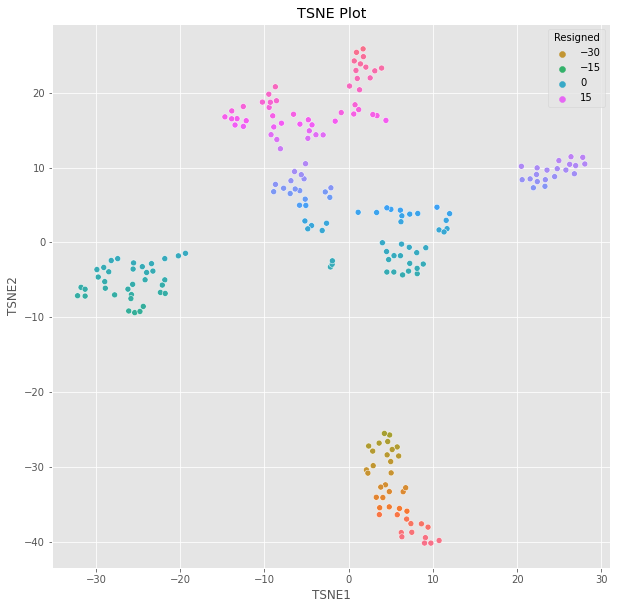

In [59]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 10))
tmse_copy = df_tsne.copy()
tmse_copy["Resigned"] = tmse_copy.iloc[:, -1]
plt.title('TSNE Plot')
sns.scatterplot(x=tmse_copy.iloc[:, 0], y=tmse_copy.iloc[:, 1], hue=tmse_copy.iloc[:, -1],palette="husl")
plt.show()


### ISOMAP

  - Create a neighborhood network at the start
- Uses graph distance to the approximate geodesic distance between all pairs of points
- Then, through eigenvalue decomposition of the geodesic distance matrix, it finds the low dimensional embedding of the dataset

Note: In non-linear manifolds, the Euclidean metric for distance holds good if and only if neighborhood structure can be approximated as linear

In [60]:
from sklearn.manifold import Isomap
embedding = Isomap()
df_isomap = embedding.fit_transform(df_scale2)
df_isomap = pd.DataFrame(df_isomap)
df_isomap 

0         1
0   -1.676919 -2.533867
1   -4.025352 -3.712395
2    0.850748 -2.902239
3   -3.555983 -3.240184
4   -1.148001 -1.801047
..        ...       ...
195 -2.554003  3.612786
196  4.237686  0.832707
197 -2.675767  3.823201
198  4.783714  0.954866
199 -3.007373  4.396807

[200 rows x 2 columns]

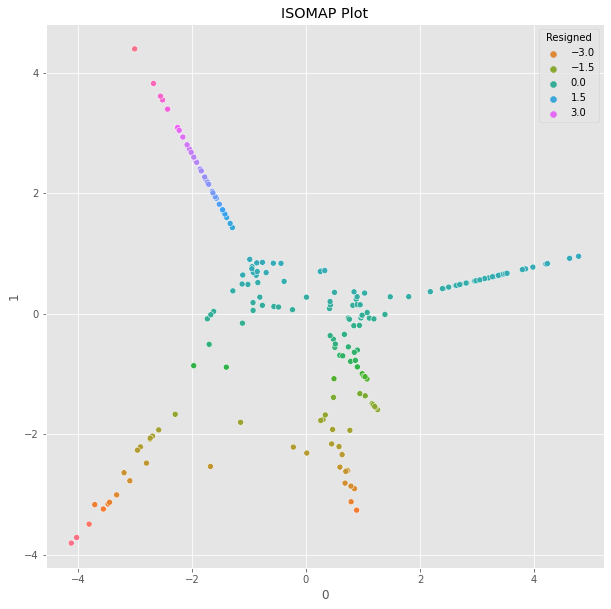

In [61]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 10))
isomap_df = df_isomap.copy()
plt.title('ISOMAP Plot')
isomap_df["Resigned"] = isomap_df.iloc[:, -1]
sns.scatterplot(x=isomap_df.iloc[:, 0], y=isomap_df.iloc[:, 1], hue=isomap_df.iloc[:, -1],palette="husl")
plt.show()



<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the above three tested dimensionality reduction technqiues, 

- TSNE Provides the best separation of data as ISOMAP does not show a clear separation and PCA does not have the highest explained variance showing data lost
</div>



<a class="anchor" id="13"></a>
## <font color='#71a1e3'> __Second Model (Hyperparameter tune)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will run each model again

Focus Models
1. Kmeans
2. Aggloreative Clustering
3. DBSCAN
4. GMM
5. BIRCH

In [62]:
import plotly.io as pio
class Advanced:
    def __init__(self):
        pass
    def silhoutte_score_analysis(self, n_clusters, X,models, feature_1_index=0, feature_2_index=1):
        cluster_labels = models.fit_predict(X)
        cluster_centroids = models.cluster_centers_
        silhouettes_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters}, Average silhouette score is: {silhouettes_avg}")
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        fig = make_subplots(rows=1, cols=2, subplot_titles=("Silhouette Plot", "Clustered Data Visualization"))
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = f'hsl({i * 360/n_clusters}, 50%, 50%)'
            fill_trace = go.Scatter(x=[x for x in ith_cluster_silhouette_values], y=np.arange(y_lower, y_upper),
                                    mode='lines', fill='tozerox', fillcolor=color)
            fig.add_trace(fill_trace, row=1, col=1)
            fig.add_trace(go.Scatter(x=[np.mean(ith_cluster_silhouette_values)] * 2,
                                     y=[y_lower, y_upper],
                                     mode='lines',
                                     line=dict(color="red", dash='dash')),
                          row=1, col=1)
            y_lower = y_upper + 10
        fig.update_xaxes(title_text="Silhouette Coefficient Values", range=[-1, 1], row=1, col=1)
        fig.update_yaxes(title_text="Cluster Labels", row=1, col=1)
        scatter_trace = go.Scatter(x=X.iloc[:, feature_1_index], y=X.iloc[:, feature_2_index],
                                   mode="markers", marker=dict(size=10, color=cluster_labels, colorscale='Viridis'))
        centroid_trace = go.Scatter(x=cluster_centroids[:, feature_1_index], y=cluster_centroids[:, feature_2_index],
                                    mode="markers", marker=dict(size=15, color='white', line=dict(width=1)))
        fig.add_trace(scatter_trace, row=1, col=2)
        fig.add_trace(centroid_trace, row=1, col=2)
        fig.update_xaxes(title_text=X.columns[feature_1_index], row=1, col=2)
        fig.update_yaxes(title_text=X.columns[feature_2_index], row=1, col=2)
        fig.update_layout(title=f"Silhouette analysis for KMeans clustering (n_clusters = {n_clusters})",
                          height=400, width=800)
        fig.show()
        return cluster_labels, models.inertia_
    
    def plot_dendrogram(self,model, **kwargs):
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack(
            [model.children_, model.distances_, counts]
        ).astype(float)
        dendrogram(linkage_matrix, **kwargs)
advanced = Advanced()

Second evaluation function

In [63]:
def compute_score2(evaluation,labels,data):
    scores = pd.DataFrame(columns=[i for i,h in evaluation ])
    score_dict = {}
    for i,j in evaluation:
        score = (j(data, labels))
        score_dict[i] = score
    scores = scores.append(score_dict, ignore_index=True)
    return scores

### K-Means Clustering

To determine what about of clusters is best
- Inertia measures how well a dataset was clustered by K-Means. 
 which is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster

  - Good model is one with low inertia and also a low number of clusters (K)
  - However, this is a tradeoff because as K increases, inertia decreases

Formula: $$I = \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

- $I$ is the inertia
- $n$ is the number of samples
- $C$ is the set of cluster centers

Run the for loop here

In [64]:
silhouette_scores = []
calinski_harabasz_scores = []
kmeans_intertia = []
davies_bouldin_scores = []
algo_type = []
for cluster in range(2, 10):
    count = 1
    label = ''
    for algo in [ 'auto', 'full']:
        labels,inertia = advanced.silhoutte_score_analysis(n_clusters=cluster, X=df_tsne,models=KMeans(n_clusters=cluster, random_state=random,algorithm=algo))
        scores = compute_score2(evaluation,labels,df_tsne)
        if count == 1:
            scores_max = scores
            label = algo
        elif scores['silhouette_score'].values[0] > scores_max['silhouette_score'].values[0]:
            scores_max = scores
            label = algo
        count += 1
    silhouette_scores.append(scores_max['silhouette_score'].values[0])
    algo_type.append(label)
    calinski_harabasz_scores.append(scores_max['calinski_harabasz_score'].values[0])
    davies_bouldin_scores.append(scores_max['davies_bouldin_score'].values[0])
    kmeans_intertia.append(inertia)
    plt.show()
print(silhouette_scores)

For n_clusters = 2, Average silhouette score is: 0.5505040884017944


For n_clusters = 2, Average silhouette score is: 0.5505040884017944


For n_clusters = 3, Average silhouette score is: 0.603843629360199


For n_clusters = 3, Average silhouette score is: 0.603843629360199


For n_clusters = 4, Average silhouette score is: 0.6222741603851318


For n_clusters = 4, Average silhouette score is: 0.6222741603851318


For n_clusters = 5, Average silhouette score is: 0.6544047594070435


For n_clusters = 5, Average silhouette score is: 0.6544047594070435


For n_clusters = 6, Average silhouette score is: 0.6512498259544373


For n_clusters = 6, Average silhouette score is: 0.6512498259544373


For n_clusters = 7, Average silhouette score is: 0.6727333068847656


For n_clusters = 7, Average silhouette score is: 0.6727333068847656


For n_clusters = 8, Average silhouette score is: 0.6189603209495544


For n_clusters = 8, Average silhouette score is: 0.6189603209495544


For n_clusters = 9, Average silhouette score is: 0.5981084704399109


For n_clusters = 9, Average silhouette score is: 0.5981084704399109


[0.5505040884017944, 0.603843629360199, 0.6222741603851318, 0.6544047594070435, 0.6512498259544373, 0.6727333068847656, 0.6189603209495544, 0.5981084704399109]


#### Analyse the inertia plot

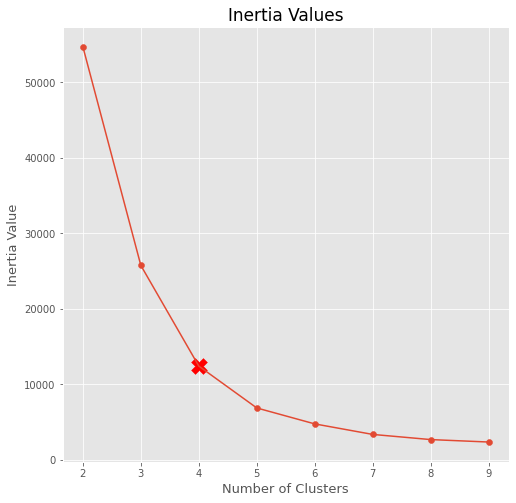

In [65]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plt.plot(range(2,10),kmeans_intertia)
plt.scatter(x = range(2,10),y = kmeans_intertia)
plt.scatter(4, kmeans_intertia[2], marker="X", s=250, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Inertia Values", size=17)
plt.show()

Analyse each of the result

In [66]:
overall_score_advanced = pd.DataFrame()
score_kmeans_ht = pd.DataFrame()
score_kmeans_ht['Clusters'] = range(2,10)
score_kmeans_ht['silhouette_score'] = silhouette_scores
score_kmeans_ht['calinski_harabasz_score'] = calinski_harabasz_scores
score_kmeans_ht['davies_bouldin_score'] = davies_bouldin_scores
sorted_kmeans = score_kmeans_ht.sort_values(by=['silhouette_score','calinski_harabasz_score'],ascending=False)
display(sorted_kmeans)
new_row = {'Type': 'KMeans', "silhouette_score": sorted_kmeans['silhouette_score'].values[0], 'calinski_harabasz_score':
           sorted_kmeans['calinski_harabasz_score'].values[0], 'davies_bouldin_score': sorted_kmeans['davies_bouldin_score'].values[0]}
overall_score_advanced = overall_score_advanced.append(new_row, ignore_index=True)

Clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
5         7          0.672733               993.559817              0.469056
3         5          0.654405               710.513006              0.495425
4         6          0.651250               834.636666              0.502440
2         4          0.622274               497.021131              0.605702
6         8          0.618960              1071.654753              0.533325
1         3          0.603844               309.977024              0.477875
7         9          0.598108              1065.422950              0.610345
0         2          0.550504               188.229920              0.509869

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From KMeans Result,
- While 4 is shown in elbow plot, it was not necessary the best hence
    - We observe that cluster 7 and 6 arre the best result according to all 3 metrics
</div>



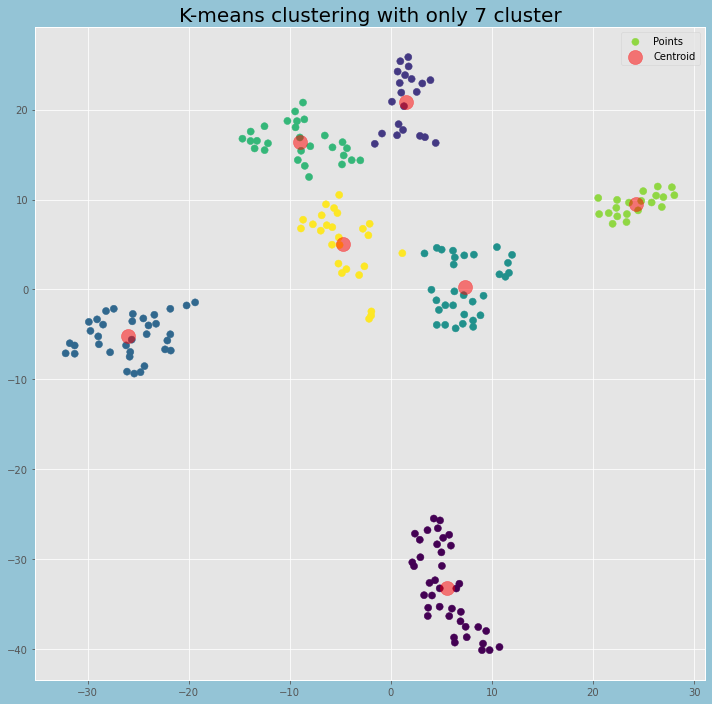

In [67]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_tsne)
y_kmeans = kmeans.predict(df_tsne)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('K-means clustering with only 7 cluster',size=20)
fig.set_facecolor('#94c4d6')
ax.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], c=y_kmeans, s=50, label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5,label='Centroid')
ax.legend()
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From KMeans Plot, we can see that the clusters are nicely separated with similar data points seen in the different clusters
</div>



In [68]:
df_kmeans_ht = df.copy()
df_kmeans_ht['ClusterGroup'] = y_kmeans+1
df_kmeans_ht

Age  Income (k$)  Spending Score  DifferenceMeanIncome  ScoreToAge  \
0     19           15              39                -45.56    2.052632   
1     21           15              81                -45.56    3.857143   
2     20           16               6                -44.56    0.300000   
3     23           16              77                -44.56    3.347826   
4     31           17              40                -43.56    1.290323   
..   ...          ...             ...                   ...         ...   
195   35          120              79                 59.44    2.257143   
196   45          126              28                 65.44    0.622222   
197   32          126              74                 65.44    2.312500   
198   32          137              18                 76.44    0.562500   
199   30          137              83                 76.44    2.766667   

     ScoreToIncome  ClusterGroup  
0         2.600000             6  
1         5.400000             6  
2         0.375000             2  
3         4.812500             6  
4         2.352941             2  
..             ...           ...  
195       0.658333             1  
196       0.222222             3  
197       0.587302             1  
198       0.131387             3  
199       0.605839             1  

[200 rows x 7 columns]

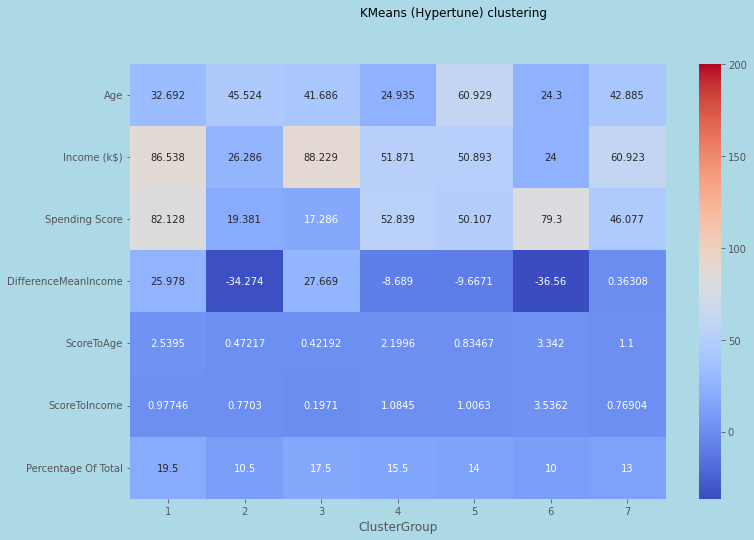

In [69]:
centers = df_kmeans_ht.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_kmeans_ht['ClusterGroup']).value_counts() / len(df_kmeans_ht['ClusterGroup']) * 100
clusteringFunc.heatmap(centers.T,'KMeans','(Hypertune)')

### Agglomerative Clustering (Hierarchical)


Here we will be picking the top 3 level

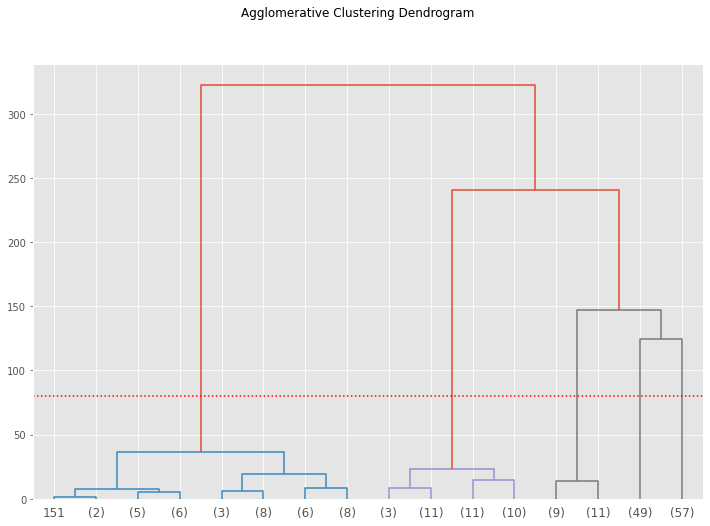

In [70]:
models = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
fig , ax = plt.subplots(1,1,figsize=(12,8))
fig.suptitle('Agglomerative Clustering Dendrogram')
model = models.fit(df_tsne)
advanced.plot_dendrogram(model, truncate_mode="level", p=3) 

plt.hlines(80, 0, 300, colors="r", linestyle=":")
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the dendogram Result,

- We can see that the most suitable number of clusters is 5 as it shows the maxmum distance of red line and cut across 5 times, we can also try out on 4

</div>



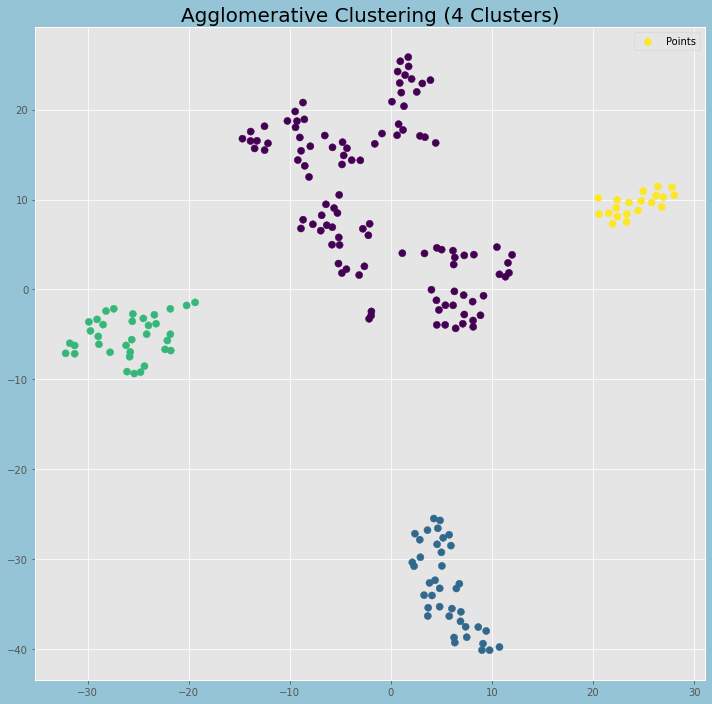

In [71]:
ac_cluster = AgglomerativeClustering(n_clusters=4)
ac_labels = ac_cluster.fit_predict(df_tsne)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('Agglomerative Clustering (4 Clusters)',size=20)
fig.set_facecolor('#94c4d6')
ax.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], c=ac_labels, s=50, label='Points')
ax.legend()
plt.show()

Check the score of 4 clusters


In [72]:
score_agglomerative = compute_score2(evaluation,ac_labels,df_tsne )
sorted_agglomerative = score_agglomerative.sort_values(by=['silhouette_score','calinski_harabasz_score'],ascending=False)
display(sorted_agglomerative)
new_row = {'Type': 'Agglomerative (4 Clusters)', "silhouette_score": sorted_agglomerative['silhouette_score'].values[0], 'calinski_harabasz_score':
           sorted_agglomerative['calinski_harabasz_score'].values[0], 'davies_bouldin_score': sorted_agglomerative['davies_bouldin_score'].values[0]}
overall_score_advanced = overall_score_advanced.append(new_row, ignore_index=True)

silhouette_score  calinski_harabasz_score  davies_bouldin_score
0          0.605957               400.324393              0.465309

In [73]:
df_ag_ht = df.copy()
df_ag_ht['ClusterGroup'] = ac_labels+1
df_ag_ht

Age  Income (k$)  Spending Score  DifferenceMeanIncome  ScoreToAge  \
0     19           15              39                -45.56    2.052632   
1     21           15              81                -45.56    3.857143   
2     20           16               6                -44.56    0.300000   
3     23           16              77                -44.56    3.347826   
4     31           17              40                -43.56    1.290323   
..   ...          ...             ...                   ...         ...   
195   35          120              79                 59.44    2.257143   
196   45          126              28                 65.44    0.622222   
197   32          126              74                 65.44    2.312500   
198   32          137              18                 76.44    0.562500   
199   30          137              83                 76.44    2.766667   

     ScoreToIncome  ClusterGroup  
0         2.600000             4  
1         5.400000             4  
2         0.375000             1  
3         4.812500             4  
4         2.352941             1  
..             ...           ...  
195       0.658333             2  
196       0.222222             3  
197       0.587302             2  
198       0.131387             3  
199       0.605839             2  

[200 rows x 7 columns]

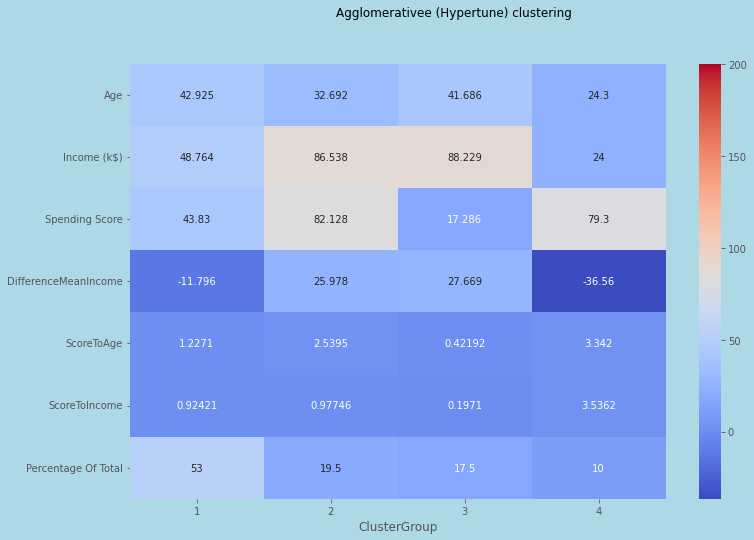

In [74]:
centers = df_ag_ht.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_ag_ht['ClusterGroup']).value_counts() / len(df_ag_ht['ClusterGroup']) * 100
clusteringFunc.heatmap(centers.T,'Agglomerativee','(Hypertune)')

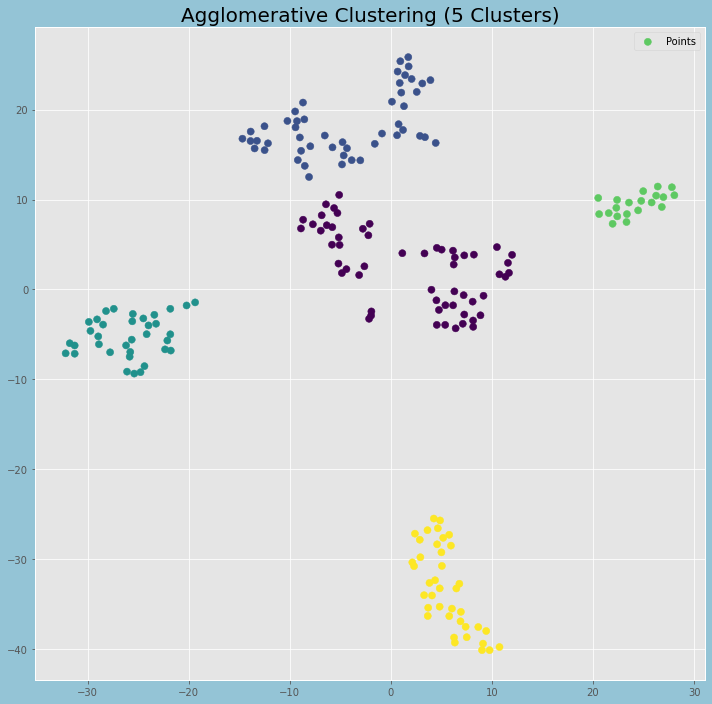

In [75]:
ac_cluster2 = AgglomerativeClustering(n_clusters=5)
ac_labels2 = ac_cluster2.fit_predict(df_tsne)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('Agglomerative Clustering (5 Clusters)',size=20)
fig.set_facecolor('#94c4d6')
ax.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], c=ac_labels2, s=50, label='Points')
ax.legend()
plt.show()

In [76]:
score_agglomerative = compute_score2(evaluation,ac_labels2,df_tsne )
sorted_agglomerative = score_agglomerative.sort_values(by=['silhouette_score','calinski_harabasz_score'],ascending=False)
display(sorted_agglomerative)
new_row = {'Type': 'Agglomerative (5 Clusters)', "silhouette_score": sorted_agglomerative['silhouette_score'].values[0], 'calinski_harabasz_score':
           sorted_agglomerative['calinski_harabasz_score'].values[0], 'davies_bouldin_score': sorted_agglomerative['davies_bouldin_score'].values[0]}
overall_score_advanced = overall_score_advanced.append(new_row, ignore_index=True)

silhouette_score  calinski_harabasz_score  davies_bouldin_score
0          0.640736               667.304159              0.543154

In [77]:
df_ag_ht = df.copy()
df_ag_ht['ClusterGroup'] = ac_labels2+1
df_ag_ht

Age  Income (k$)  Spending Score  DifferenceMeanIncome  ScoreToAge  \
0     19           15              39                -45.56    2.052632   
1     21           15              81                -45.56    3.857143   
2     20           16               6                -44.56    0.300000   
3     23           16              77                -44.56    3.347826   
4     31           17              40                -43.56    1.290323   
..   ...          ...             ...                   ...         ...   
195   35          120              79                 59.44    2.257143   
196   45          126              28                 65.44    0.622222   
197   32          126              74                 65.44    2.312500   
198   32          137              18                 76.44    0.562500   
199   30          137              83                 76.44    2.766667   

     ScoreToIncome  ClusterGroup  
0         2.600000             4  
1         5.400000             4  
2         0.375000             2  
3         4.812500             4  
4         2.352941             2  
..             ...           ...  
195       0.658333             5  
196       0.222222             3  
197       0.587302             5  
198       0.131387             3  
199       0.605839             5  

[200 rows x 7 columns]

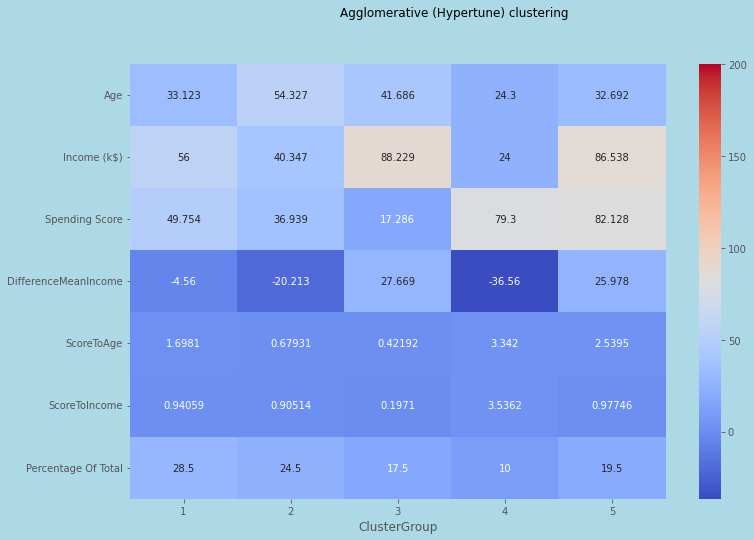

In [78]:
centers = df_ag_ht.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_ag_ht['ClusterGroup']).value_counts() / len(df_ag_ht['ClusterGroup']) * 100
clusteringFunc.heatmap(centers.T,'Agglomerative','(Hypertune)')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the dendogram Result,

- We can see that the most suitable number of clusters is 5 after looking at the graph and comparing across different evaluation metrics 
- Clusters seem to have even distribution and no overlap here

</div>



### DBSCAN

In [79]:
eps_arr = np.arange(2, 20)  
min_samples_arr = np.arange(1, 10, 1) 

scores_dbscan_ht = pd.DataFrame(columns = ['eps','min_samples'] + [i[0] for i in evaluation])
for eps in tqdm(eps_arr):
    for min_samples in min_samples_arr:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df_tsne)
        score = compute_score2(evaluation, dbscan_labels,df_tsne )
        score = score.mean().to_dict()
        new_row = {**{'eps':eps,'min_samples':min_samples},**score}
        scores_dbscan_ht = scores_dbscan_ht.append(new_row,ignore_index=True)
        

100%|██████████| 18/18 [00:03<00:00,  5.64it/s]


Analysis of the scores

In [80]:
sorted_dbscan=scores_dbscan_ht.sort_values(by=['silhouette_score','calinski_harabasz_score'],ascending=False)
display(sorted_dbscan)
new_row = {'Type': 'DBSCAN', "silhouette_score": sorted_dbscan['silhouette_score'].values[0], 'calinski_harabasz_score':
           sorted_dbscan['calinski_harabasz_score'].values[0], 'davies_bouldin_score': sorted_dbscan['davies_bouldin_score'].values[0]}
overall_score_advanced = overall_score_advanced.append(new_row, ignore_index=True)

eps  min_samples  silhouette_score  calinski_harabasz_score  \
15  3.0          7.0          0.619838               738.866771   
27  5.0          1.0          0.605957               400.324393   
28  5.0          2.0          0.605957               400.324393   
29  5.0          3.0          0.605957               400.324393   
30  5.0          4.0          0.605957               400.324393   
..  ...          ...               ...                      ...   
4   2.0          5.0          0.382370               111.642138   
5   2.0          6.0          0.283432                72.414220   
6   2.0          7.0          0.104311                43.576167   
7   2.0          8.0         -0.084328                21.143573   
8   2.0          9.0         -0.116095                14.603271   

    davies_bouldin_score  
15              1.078578  
27              0.465309  
28              0.465309  
29              0.465309  
30              0.465309  
..                   ...  
4               1.932601  
5               1.185991  
6               1.214105  
7               1.198932  
8               1.151710  

[162 rows x 5 columns]

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the result,

- We can see that the number of eps that provides the best scores are eps = 3 and min samples = 7

</div>



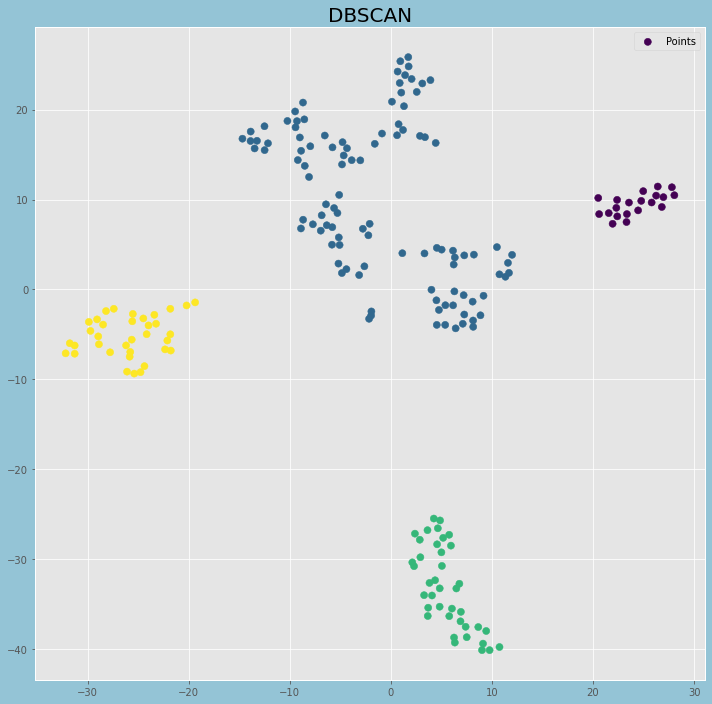

In [81]:
db_cluster = DBSCAN(eps=5, min_samples=9)
db_labels = db_cluster.fit_predict(df_tsne)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('DBSCAN',size=20)
fig.set_facecolor('#94c4d6')
ax.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], c=db_labels, s=50, label='Points')
ax.legend()
plt.show()

In [82]:
df_db_ht = df.copy()
df_db_ht['ClusterGroup'] = db_labels+1
df_db_ht

Age  Income (k$)  Spending Score  DifferenceMeanIncome  ScoreToAge  \
0     19           15              39                -45.56    2.052632   
1     21           15              81                -45.56    3.857143   
2     20           16               6                -44.56    0.300000   
3     23           16              77                -44.56    3.347826   
4     31           17              40                -43.56    1.290323   
..   ...          ...             ...                   ...         ...   
195   35          120              79                 59.44    2.257143   
196   45          126              28                 65.44    0.622222   
197   32          126              74                 65.44    2.312500   
198   32          137              18                 76.44    0.562500   
199   30          137              83                 76.44    2.766667   

     ScoreToIncome  ClusterGroup  
0         2.600000             1  
1         5.400000             1  
2         0.375000             2  
3         4.812500             1  
4         2.352941             2  
..             ...           ...  
195       0.658333             3  
196       0.222222             4  
197       0.587302             3  
198       0.131387             4  
199       0.605839             3  

[200 rows x 7 columns]

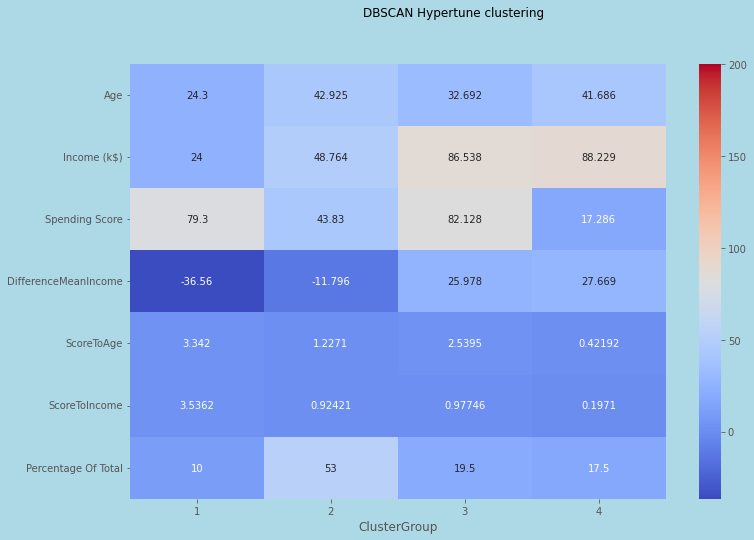

In [83]:
centers = df_db_ht.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_db_ht['ClusterGroup']).value_counts() / len(df_db_ht['ClusterGroup']) * 100
clusteringFunc.heatmap(centers.T,'DBSCAN','Hypertune')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the clustering plot,

- We can see that the number of eps that provides the best scores are eps = 3 and min samples = 7 is a pefect fit as all the clusters are separated distinctly

</div>



### GMM Model

In [84]:
n_components = np.arange(3, 25)
c_type = ['full', 'tied', 'diag', 'spherical']

scores_gmm_ht = pd.DataFrame(columns = ['cov_type','n'] + [i[0] for i in evaluation])
for cov_type in tqdm(c_type):
    for n in n_components:
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type).fit(df_tsne)
        gmm_labels = gmm.predict(df_tsne)
        score = compute_score2(evaluation, gmm_labels,df_tsne )
        score = score.mean().to_dict()
        new_row = {**{'cov_type':cov_type,'n':n},**score}
        scores_gmm_ht = scores_gmm_ht.append(new_row,ignore_index=True)


100%|██████████| 4/4 [00:05<00:00,  1.27s/it]


Analysis of our scores

In [85]:
sorted_gmm=scores_gmm_ht.sort_values(by=['silhouette_score','calinski_harabasz_score'],ascending=False)
display(sorted_gmm)
new_row = {'Type': 'GMM', "silhouette_score": sorted_gmm['silhouette_score'].values[0], 'calinski_harabasz_score':
           sorted_gmm['calinski_harabasz_score'].values[0], 'davies_bouldin_score': sorted_dbscan['davies_bouldin_score'].values[0]}
overall_score_advanced = overall_score_advanced.append(new_row, ignore_index=True)

cov_type   n  silhouette_score  calinski_harabasz_score  \
26       tied   7          0.672733               993.559817   
48       diag   7          0.666724               972.024635   
24       tied   5          0.658897               707.214403   
46       diag   5          0.657100               688.789596   
68  spherical   5          0.654903               672.462552   
..        ...  ..               ...                      ...   
20       full  23          0.447810              1299.911359   
65       diag  24          0.428041              1166.429463   
86  spherical  23          0.426082              1275.555460   
19       full  22          0.406942              1068.310241   
0        full   3          0.381272               135.050285   

    davies_bouldin_score  
26              0.469056  
48              0.477373  
24              0.472599  
46              0.461395  
68              0.456406  
..                   ...  
20              0.716532  
65              0.702087  
86              0.737877  
19              0.735623  
0               1.233904  

[88 rows x 5 columns]

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the result,

- We can see that the number of cov_types that provides the best scores are tied, spherical and as 7

</div>



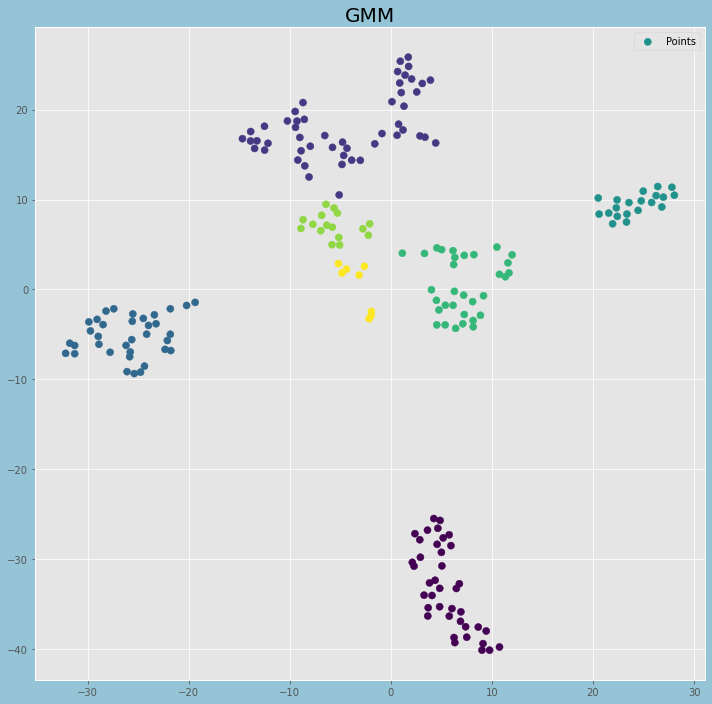

In [86]:
gmm_cluster = GaussianMixture(n_components=7, covariance_type='spherical').fit(df_tsne)
gmm_labels = gmm_cluster.fit_predict(df_tsne)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('GMM',size=20)
fig.set_facecolor('#94c4d6')
ax.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], c=gmm_labels, s=50, label='Points')
ax.legend()
plt.show()

In [87]:
df_gmm_ht = df.copy()
df_gmm_ht['ClusterGroup'] = gmm_labels+1
df_gmm_ht

Age  Income (k$)  Spending Score  DifferenceMeanIncome  ScoreToAge  \
0     19           15              39                -45.56    2.052632   
1     21           15              81                -45.56    3.857143   
2     20           16               6                -44.56    0.300000   
3     23           16              77                -44.56    3.347826   
4     31           17              40                -43.56    1.290323   
..   ...          ...             ...                   ...         ...   
195   35          120              79                 59.44    2.257143   
196   45          126              28                 65.44    0.622222   
197   32          126              74                 65.44    2.312500   
198   32          137              18                 76.44    0.562500   
199   30          137              83                 76.44    2.766667   

     ScoreToIncome  ClusterGroup  
0         2.600000             4  
1         5.400000             4  
2         0.375000             2  
3         4.812500             4  
4         2.352941             2  
..             ...           ...  
195       0.658333             1  
196       0.222222             3  
197       0.587302             1  
198       0.131387             3  
199       0.605839             1  

[200 rows x 7 columns]

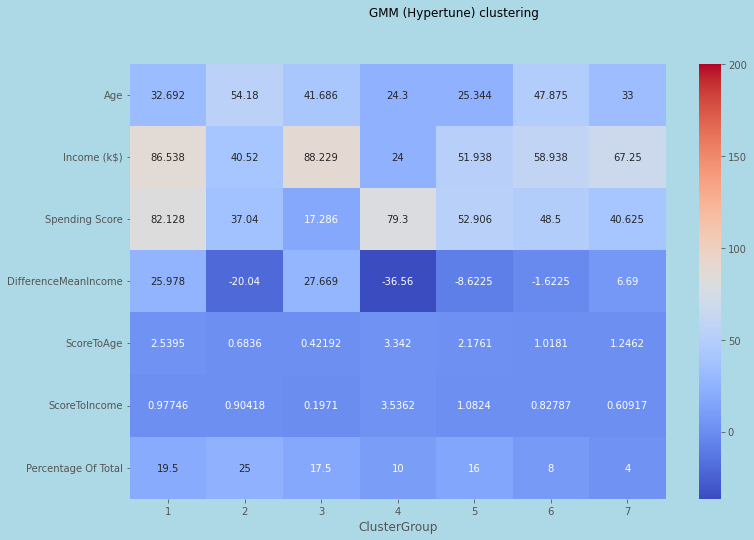

In [88]:
centers = df_gmm_ht.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_gmm_ht['ClusterGroup']).value_counts() / len(df_gmm_ht['ClusterGroup']) * 100
clusteringFunc.heatmap(centers.T,'GMM','(Hypertune)')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the result,

- The data points are well distributed and each points is split accordingly
</div>



### BIRCH

In [89]:
n_clusters = [3, 5, 7, 9, 11]
threshold = [0.3, 0.5, 0.7, 1.0]
branching_factor = [20, 50, 100]

scores_birch_ht = pd.DataFrame(columns = ['n_clusters','threshold','branching_factor'] + [i[0] for i in evaluation])
for n in n_clusters:
    for t in threshold:
        for b in branching_factor:
            birch = Birch(n_clusters=n, threshold=t, branching_factor=b)
            labels = birch.fit_predict(df_tsne)
            score = compute_score2(evaluation, labels,df_tsne )
            score = score.mean().to_dict()
            new_row = {**{'n_clusters':n,'threshold':n,"branching_factor":b},**score}
            scores_birch_ht = scores_birch_ht.append(new_row,ignore_index=True)

In [90]:
scores_birch_ht.sort_values(by=['silhouette_score',	'calinski_harabasz_score'],ascending=False).head(5)

n_clusters  threshold  branching_factor  silhouette_score  \
24         7.0        7.0              20.0          0.672231   
25         7.0        7.0              50.0          0.672231   
26         7.0        7.0             100.0          0.672231   
27         7.0        7.0              20.0          0.672231   
28         7.0        7.0              50.0          0.672231   

    calinski_harabasz_score  davies_bouldin_score  
24               989.216648              0.468256  
25               989.216648              0.468256  
26               989.216648              0.468256  
27               989.216648              0.468256  
28               989.216648              0.468256

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the result,

- We can see that the number of n_clusters that provides the best scores are 7, threshold is 7 and branding factor is 20

</div>



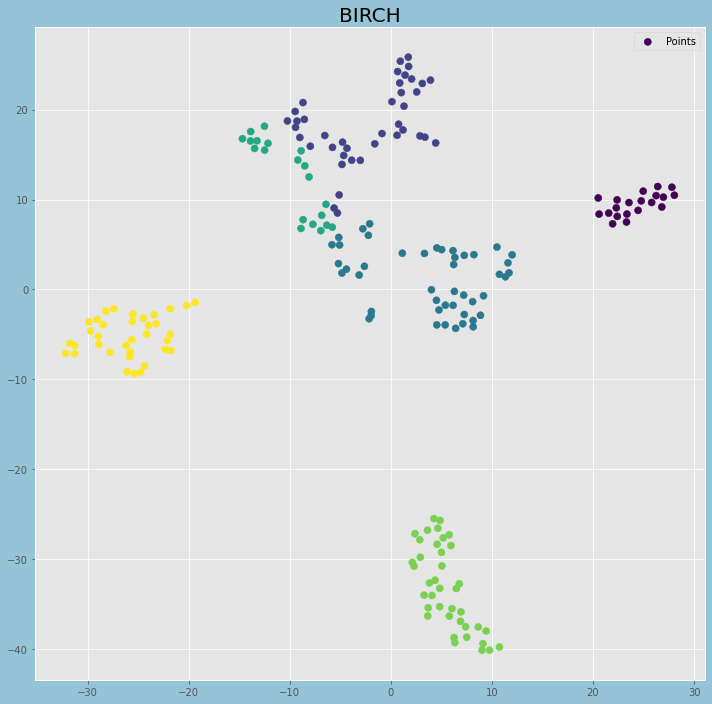

In [91]:
birch_cluster = Birch(n_clusters=7, threshold=7, branching_factor=20).fit(df_tsne)
birch_labels = birch_cluster.fit_predict(df_tsne)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('BIRCH',size=20)
fig.set_facecolor('#94c4d6')
ax.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], c=birch_labels, s=50, label='Points')
ax.legend()
plt.show()

In [92]:
df_birch_ht = df.copy()
df_birch_ht['ClusterGroup'] = birch_labels+1
df_birch_ht

Age  Income (k$)  Spending Score  DifferenceMeanIncome  ScoreToAge  \
0     19           15              39                -45.56    2.052632   
1     21           15              81                -45.56    3.857143   
2     20           16               6                -44.56    0.300000   
3     23           16              77                -44.56    3.347826   
4     31           17              40                -43.56    1.290323   
..   ...          ...             ...                   ...         ...   
195   35          120              79                 59.44    2.257143   
196   45          126              28                 65.44    0.622222   
197   32          126              74                 65.44    2.312500   
198   32          137              18                 76.44    0.562500   
199   30          137              83                 76.44    2.766667   

     ScoreToIncome  ClusterGroup  
0         2.600000             1  
1         5.400000             1  
2         0.375000             2  
3         4.812500             1  
4         2.352941             2  
..             ...           ...  
195       0.658333             5  
196       0.222222             6  
197       0.587302             5  
198       0.131387             6  
199       0.605839             5  

[200 rows x 7 columns]

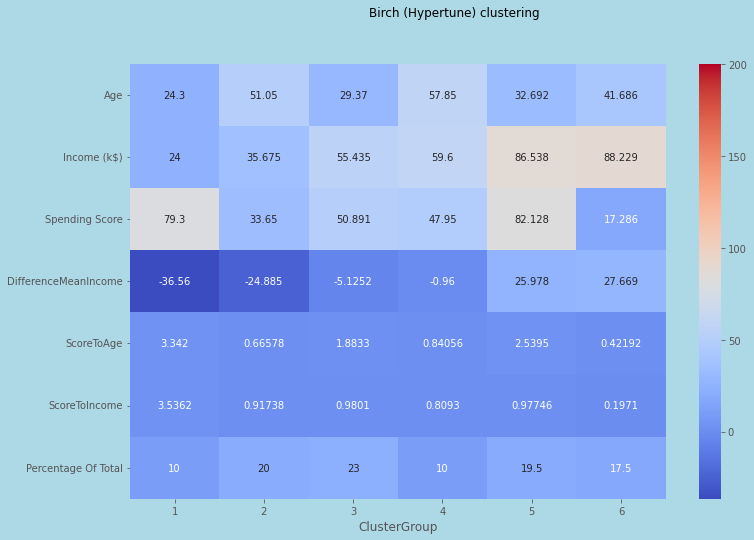

In [93]:
centers = df_birch_ht.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_birch_ht['ClusterGroup']).value_counts() / len(df_birch_ht['ClusterGroup']) * 100
clusteringFunc.heatmap(centers.T,'Birch','(Hypertune)')

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the result,

- The data can be abit too close with each other and the proportion may not be distributed well

</div>



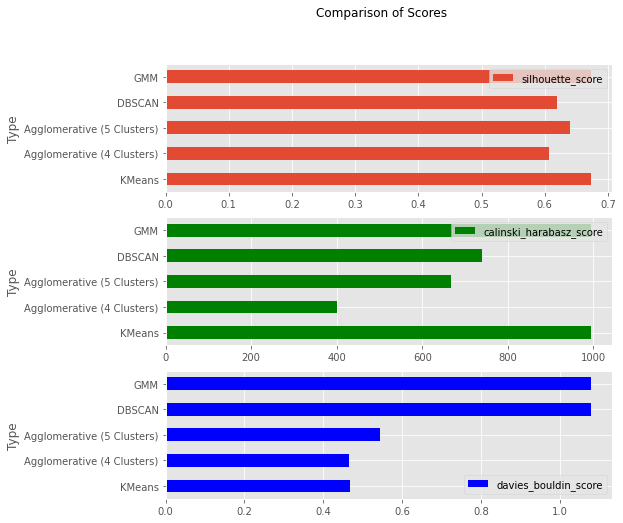

In [94]:
fig,ax = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('Comparison of Scores')
overall_score_advanced[['Type','silhouette_score']].plot.barh(x = 'Type',ax=ax[0])
overall_score_advanced[['Type','calinski_harabasz_score']].plot.barh(x = 'Type',ax=ax[1],color='green')
overall_score_advanced[['Type','davies_bouldin_score']].plot.barh(x = 'Type',ax=ax[2],color='blue')
plt.show()

<a class="anchor" id="14"></a>
## <font color='#71a1e3'> __Final Model__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Here we will set the final model

Base on the final score and the cluster distinction, the final 2 models are

1. KMeans
2. GMM

### KMeans

Before checking on the final model, let us do a comparison when finding the top 3 best features where we will be using combinations and to list down all the possible combinations

#### Combinatrics


In [95]:
from itertools import combinations
feature_combinations = list(combinations(df.columns[1:],4))
feature_combinations

[('Income (k$)', 'Spending Score', 'DifferenceMeanIncome', 'ScoreToAge'),
 ('Income (k$)', 'Spending Score', 'DifferenceMeanIncome', 'ScoreToIncome'),
 ('Income (k$)', 'Spending Score', 'ScoreToAge', 'ScoreToIncome'),
 ('Income (k$)', 'DifferenceMeanIncome', 'ScoreToAge', 'ScoreToIncome'),
 ('Spending Score', 'DifferenceMeanIncome', 'ScoreToAge', 'ScoreToIncome')]

Setting the for loop and different combinations, including tsne dimensionality reduction for each combination

In [96]:
kmeans_combi = pd.DataFrame(columns = [i[0] for i in evaluation])
for i in tqdm(feature_combinations):    
    for k in range(2,10):
        df_tsne2 = pd.DataFrame(tsne.fit_transform(df_scale[list(i)]),columns=['TSNE1','TSNE2'])
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df_tsne2)
        cluster_centroids = kmeans.cluster_centers_
        score = compute_score2(evaluation, cluster_labels, df_tsne2 )
        score = score.mean().to_dict()
        new_row = {**{'feature':i,'k':k},**score}
        kmeans_combi = kmeans_combi.append(new_row,ignore_index=True)

100%|██████████| 5/5 [00:36<00:00,  7.33s/it]


In [97]:
kmeans_combi.sort_values(by=['silhouette_score','calinski_harabasz_score'],ascending=False)

silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
5           0.671861              1200.103442              0.451337   
6           0.666840              1222.118931              0.469917   
10          0.647179               732.702337              0.457801   
14          0.639825              1141.072254              0.536248   
9           0.638890               473.286696              0.518153   
16          0.638522               341.789310              0.371498   
32          0.638522               341.789310              0.371498   
4           0.636742               936.954731              0.500692   
11          0.636035               843.152690              0.487814   
12          0.633763               930.938785              0.514242   
28          0.632376               641.389608              0.482974   
13          0.630297              1106.810737              0.533052   
29          0.626752               731.458993              0.500947   
20          0.621502              1043.949268              0.517582   
36          0.621502              1043.949268              0.517582   
3           0.618963               796.136355              0.525580   
19          0.616519               922.232611              0.542317   
35          0.616059               921.737553              0.539365   
21          0.614389              1220.198314              0.541996   
37          0.614389              1220.198314              0.541996   
0           0.612623               271.362249              0.420088   
30          0.609210               752.018806              0.537545   
39          0.608579              1258.466585              0.585895   
23          0.607733              1259.001475              0.582346   
27          0.605527               501.442551              0.512546   
22          0.603543              1224.807487              0.596262   
38          0.602987              1224.237749              0.595451   
2           0.598579               582.128830              0.598907   
18          0.592391               762.489356              0.610987   
34          0.592391               762.489356              0.610987   
17          0.588180               551.621935              0.522294   
33          0.588180               551.621935              0.522294   
15          0.585611              1244.743014              0.599394   
7           0.583828              1227.087719              0.579379   
1           0.579072               451.823990              0.559576   
31          0.575432               817.866826              0.570925   
26          0.574521               380.123885              0.571809   
25          0.542917               262.256376              0.614026   
24          0.492689               229.297360              0.859658   
8           0.485069               215.725360              0.828586   

                                              feature    k  
5   (Income (k$), Spending Score, DifferenceMeanIn...  7.0  
6   (Income (k$), Spending Score, DifferenceMeanIn...  8.0  
10  (Income (k$), Spending Score, DifferenceMeanIn...  4.0  
14  (Income (k$), Spending Score, DifferenceMeanIn...  8.0  
9   (Income (k$), Spending Score, DifferenceMeanIn...  3.0  
16  (Income (k$), Spending Score, ScoreToAge, Scor...  2.0  
32  (Spending Score, DifferenceMeanIncome, ScoreTo...  2.0  
4   (Income (k$), Spending Score, DifferenceMeanIn...  6.0  
11  (Income (k$), Spending Score, DifferenceMeanIn...  5.0  
12  (Income (k$), Spending Score, DifferenceMeanIn...  6.0  
28  (Income (k$), DifferenceMeanIncome, ScoreToAge...  6.0  
13  (Income (k$), Spending Score, DifferenceMeanIn...  7.0  
29  (Income (k$), DifferenceMeanIncome, ScoreToAge...  7.0  
20  (Income (k$), Spending Score, ScoreToAge, Scor...  6.0  
36  (Spending Score, DifferenceMeanIncome, ScoreTo...  6.0  
3   (Income (k$), Spending Score, DifferenceMeanIn...  5.0  
19  (Income (k$), Spending Score, ScoreToAge, Scor...  

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the result,

- We see that while silhouette score abd davies bouldin score is around the same, the combinatrics feature provided slightly better scores for calinski harabasz score, hence the final model will be base on the combinatrics features
</div>



Retrieve the columns

In [98]:
cols = kmeans_combi.sort_values(by=['silhouette_score','calinski_harabasz_score'],ascending=False)['feature'][0]

Dimensionality Reduction for new df

In [99]:
df_tsne2 = pd.DataFrame(tsne.fit_transform(
    df_scale[list(cols)]), columns=['TSNE1', 'TSNE2'])
kmeans = KMeans(n_clusters=k)


#### Clustering Plot

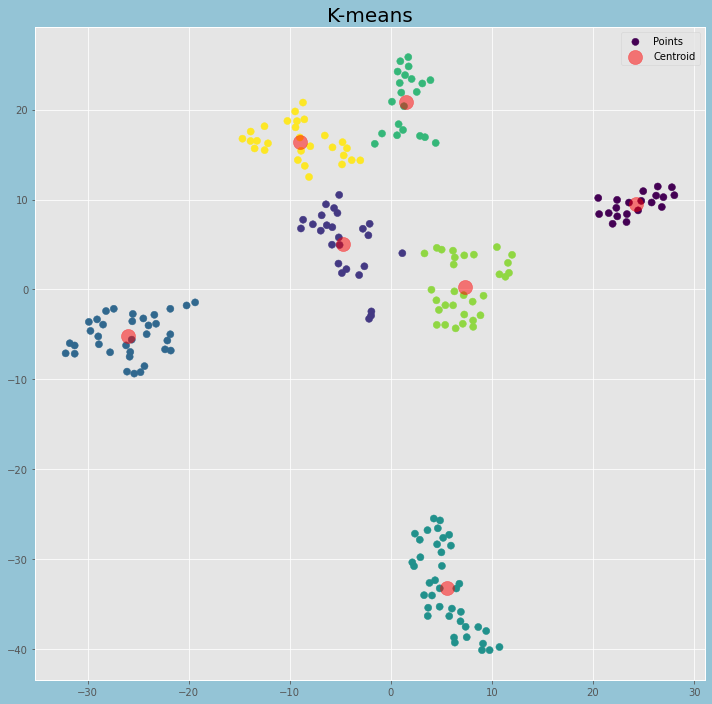

In [100]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_tsne)
y_kmeans = kmeans.predict(df_tsne)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('K-means',size=20)
fig.set_facecolor('#94c4d6')
ax.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], c=y_kmeans, s=50, label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5,label='Centroid')
ax.legend()
plt.show()

#### Heatmap Visualisation

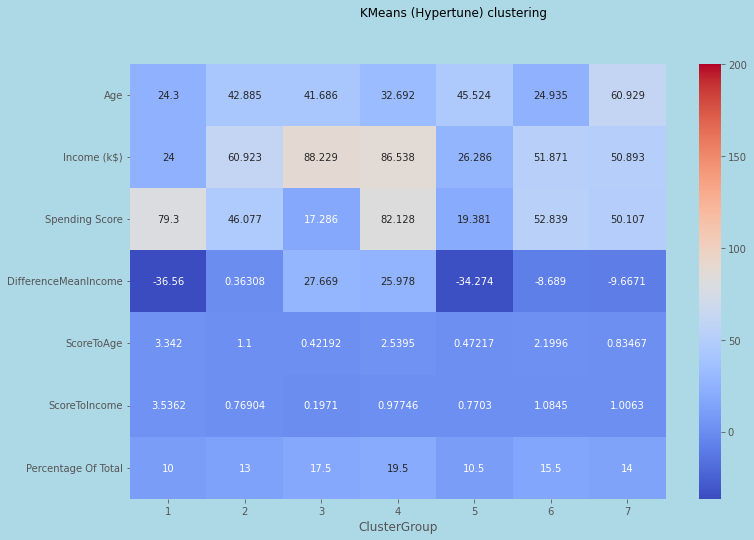

In [101]:
df_kmeans_ht = df.copy()
df_kmeans_ht['ClusterGroup'] = y_kmeans+1
centers = df_kmeans_ht.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_kmeans_ht['ClusterGroup']).value_counts() / len(df_kmeans_ht['ClusterGroup']) * 100
clusteringFunc.heatmap(centers.T,'KMeans','(Hypertune)')

In [102]:
compute_score2(evaluation,y_kmeans,df_tsne )

silhouette_score  calinski_harabasz_score  davies_bouldin_score
0          0.672733               993.559817              0.469056

#### Surrogate model

- This is use for better interpretation of the different clusters base on the different model

In [103]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(random_state=random)
dtc.fit(df_kmeans_ht.drop('ClusterGroup',axis=1), df_kmeans_ht['ClusterGroup'])

DecisionTreeClassifier(random_state=RandomState(MT19937) at 0x246549CD940)

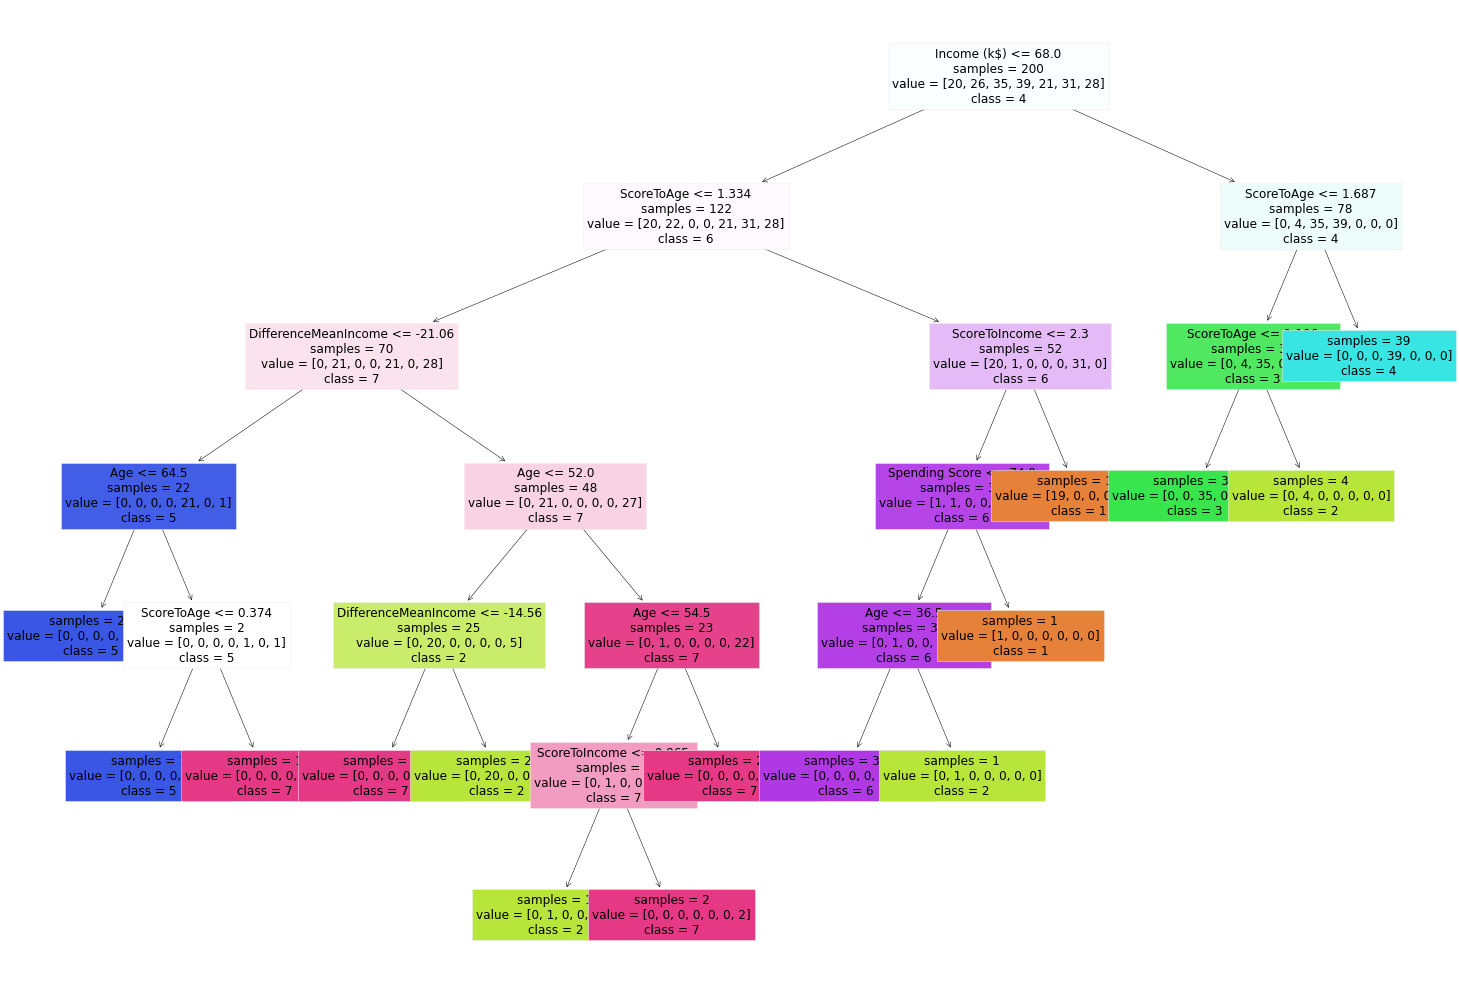

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(25, 18))

plot_tree(dtc, feature_names=df_kmeans_ht.drop('ClusterGroup', axis=1).columns.to_list(), class_names=list(np.unique(df_kmeans_ht['ClusterGroup'].values.astype(str))), impurity=False,
          filled=True, ax=ax, fontsize=12)
plt.show()


#### Cluster Interpretation - KMeans

__Cluster 1: High Inome middle age Customers (Save Type)__<br/>

> Spenders in this grop has a relatively high income of 88k but with a low spending score of 17, in addition, they are in the high ses with comparison to mean with a relatively low score to income ratio and score to age ratio

> Overall, the are considered as the high income but thrifty shopping mall can offer vouchers to entice them

__Cluster 2: Young adults who just come out from university and have not found job__<br/>

> This cluster contains relatively young people average age 24 years old with  low income in comparison, they have a high spending score with a high score to age ratio and high score to income ratio

> Overall, this is the group that most shopping mall can continue to target and utilise vouchers to attract them as a form of marketing strategy

__Cluster 3: Young working adults who has work for quite some time__<br/>

> This cluster contains customer at around 32 years old with  high income in comparison, they have a high spending score with a high score to age ratio and close to 1 score to income ratio

> Overall, this is the group that shopping mall can target to entice them to spend even more

__Cluster 4: Old People with moderate income and likely close to retirement__<br/>

> This cluster focus on old people who has a moderate income of 50k and a moderate spending score. Slightly lower than mean income and a close to 1 ratio of score to income and low score to age

> Overall, this is the group that shopping mall maybe can have some form of things that are more suitable for old age to entice them to buy

__Cluster 5: Middle Age adults with moderate income__<br/>

> This cluster contains middle age audlts similar to cluster 1, but this group has a closer to mean income and and a higher than 1 score to age and lower than one score to income

> Overall, this is the group that shopping mall can target with buy 1 free 1 sales

__Cluster 6: Young adults who has moderate income__<br/>

> This cluster is similar to cluster 2, but they do have a higher income and a lower spending score and a smaller score to income ratio 
> Overall, this is the group that most shopping mall can continue to target and utilise vouchers to attract them as a form of marketing strategy
> 
__Cluster 7: Middle Age adults who are low income__<br/>

> This cluster contains middle age with a low income with a low spending score and is considered low ses but have a relative close to 1 score to income ratio 

> Overall, this is the group that may need to most help and therefore provide them with grants or monthly grocery vouchers


### GMM

Final Model is where the n components is 7 and the covariance type is tied

In [105]:
gmm_score = pd.DataFrame(columns = [i[0] for i in evaluation])
for i in tqdm(feature_combinations):    
    for k in range(2,10):
        df_tsne2 = pd.DataFrame(tsne.fit_transform(df_scale[list(i)]),columns=['TSNE1','TSNE2'])
        gmm_model = GaussianMixture(n_components=k)
        cluster_labels = kmeans.fit_predict(df_tsne2)
        score = compute_score2(evaluation, cluster_labels, df_tsne2 )
        score = score.mean().to_dict()
        new_row = {**{'feature':i,'k':k},**score}
        gmm_score = gmm_score.append(new_row,ignore_index=True)

100%|██████████| 5/5 [00:48<00:00,  9.63s/it]


In [106]:
gmm_score.sort_values(by=['silhouette_score','calinski_harabasz_score'],ascending=False)

silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
0           0.671861              1200.103442              0.451337   
1           0.671861              1200.103442              0.451337   
2           0.671861              1200.103442              0.451337   
3           0.671861              1200.103442              0.451337   
4           0.671861              1200.103442              0.451337   
5           0.671861              1200.103442              0.451337   
6           0.671861              1200.103442              0.451337   
7           0.671861              1200.103442              0.451337   
14          0.630853              1107.034385              0.534994   
8           0.630297              1106.810737              0.533052   
9           0.630297              1106.810737              0.533052   
10          0.630297              1106.810737              0.533052   
11          0.630297              1106.810737              0.533052   
12          0.630297              1106.810737              0.533052   
13          0.630297              1106.810737              0.533052   
15          0.630297              1106.810737              0.533052   
24          0.626752               731.458993              0.500947   
25          0.626752               731.458993              0.500947   
26          0.626752               731.458993              0.500947   
27          0.626752               731.458993              0.500947   
29          0.626752               731.458993              0.500947   
30          0.626752               731.458993              0.500947   
31          0.626752               731.458993              0.500947   
28          0.623321               726.199944              0.502952   
18          0.614484              1219.304523              0.540355   
37          0.614484              1219.304523              0.540355   
39          0.614484              1219.304523              0.540355   
16          0.614389              1220.198314              0.541996   
17          0.614389              1220.198314              0.541996   
19          0.614389              1220.198314              0.541996   
20          0.614389              1220.198314              0.541996   
21          0.614389              1220.198314              0.541996   
22          0.614389              1220.198314              0.541996   
23          0.614389              1220.198314              0.541996   
32          0.614389              1220.198314              0.541996   
33          0.614389              1220.198314              0.541996   
34          0.614389              1220.198314              0.541996   
35          0.614389              1220.198314              0.541996   
36          0.614389              1220.198314              0.541996   
38          0.614389              1220.198314              0.541996   

                                              feature    k  
0   (Income (k$), Spending Score, DifferenceMeanIn...  2.0  
1   (Income (k$), Spending Score, DifferenceMeanIn...  3.0  
2   (Income (k$), Spending Score, DifferenceMeanIn...  4.0  
3   (Income (k$), Spending Score, DifferenceMeanIn...  5.0  
4   (Income (k$), Spending Score, DifferenceMeanIn...  6.0  
5   (Income (k$), Spending Score, DifferenceMeanIn...  7.0  
6   (Income (k$), Spending Score, DifferenceMeanIn...  8.0  
7   (Income (k$), Spending Score, DifferenceMeanIn...  9.0  
14  (Income (k$), Spending Score, DifferenceMeanIn...  8.0  
8   (Income (k$), Spending Score, DifferenceMeanIn...  2.0  
9   (Income (k$), Spending Score, DifferenceMeanIn...  3.0  
10  (Income (k$), Spending Score, DifferenceMeanIn...  4.0  
11  (Income (k$), Spending Score, DifferenceMeanIn...  5.0  
12  (Income (k$), Spending Score, DifferenceMeanIn...  6.0  
13  (Income (k$), Spending Score, DifferenceMeanIn...  7.0  
15  (Income (k$), Spending Score, DifferenceMeanIn...  9.0  
24  (Income (k$), DifferenceMeanIncome, ScoreToAge...  

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the result,

- We see that while silhouette score and calinski harabasz score performed worse as compared to the hypertune model hence in this case the final model will be the hypertune GMM Model
</div>



#### Clustering Plot

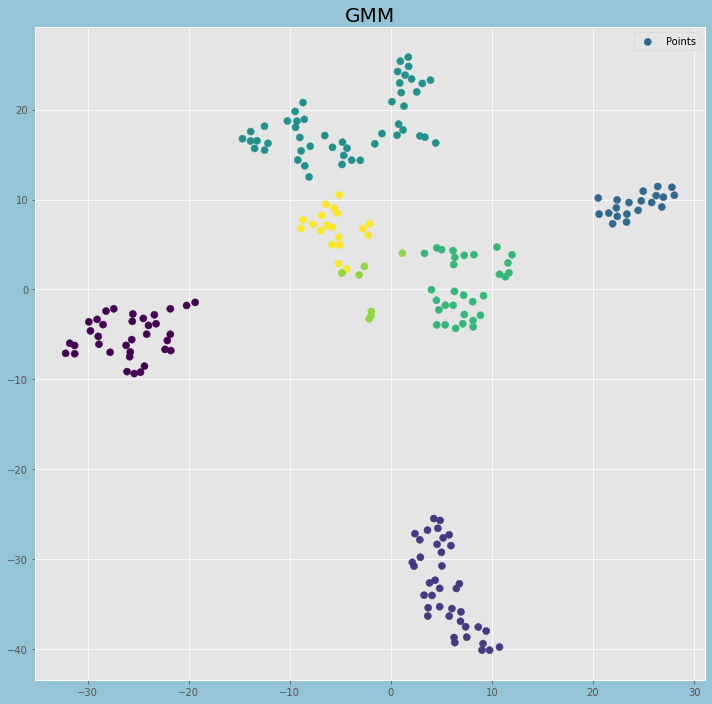

In [107]:
gmm_cluster = GaussianMixture(n_components=7, covariance_type='tied').fit(df_tsne)
gmm_labels = gmm_cluster.fit_predict(df_tsne)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('GMM',size=20)
fig.set_facecolor('#94c4d6')
ax.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], c=gmm_labels, s=50, label='Points')
ax.legend()
plt.show()

In [108]:
df_gmm_ht = df.copy()
df_gmm_ht['ClusterGroup'] = gmm_labels+1
df_gmm_ht

Age  Income (k$)  Spending Score  DifferenceMeanIncome  ScoreToAge  \
0     19           15              39                -45.56    2.052632   
1     21           15              81                -45.56    3.857143   
2     20           16               6                -44.56    0.300000   
3     23           16              77                -44.56    3.347826   
4     31           17              40                -43.56    1.290323   
..   ...          ...             ...                   ...         ...   
195   35          120              79                 59.44    2.257143   
196   45          126              28                 65.44    0.622222   
197   32          126              74                 65.44    2.312500   
198   32          137              18                 76.44    0.562500   
199   30          137              83                 76.44    2.766667   

     ScoreToIncome  ClusterGroup  
0         2.600000             3  
1         5.400000             3  
2         0.375000             4  
3         4.812500             3  
4         2.352941             4  
..             ...           ...  
195       0.658333             2  
196       0.222222             1  
197       0.587302             2  
198       0.131387             1  
199       0.605839             2  

[200 rows x 7 columns]

#### Heatmap Visualisation

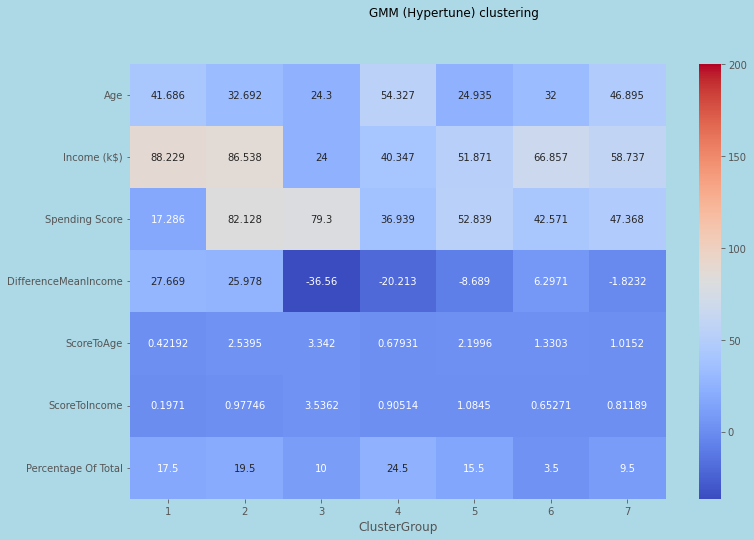

In [109]:
centers = df_gmm_ht.groupby('ClusterGroup').mean()
centers['Percentage Of Total'] = pd.Series(df_gmm_ht['ClusterGroup']).value_counts() / len(df_gmm_ht['ClusterGroup']) * 100
clusteringFunc.heatmap(centers.T,'GMM','(Hypertune)')

In [110]:
compute_score2(evaluation,gmm_labels,df_tsne )

silhouette_score  calinski_harabasz_score  davies_bouldin_score
0          0.592642               708.440808              0.553256

#### Surrogate model

- This is use for better interpretation of the different clusters base on the different model

In [111]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(random_state=random)
dtc.fit(df_gmm_ht.drop('ClusterGroup',axis=1), df_gmm_ht['ClusterGroup'])

DecisionTreeClassifier(random_state=RandomState(MT19937) at 0x246549CD940)

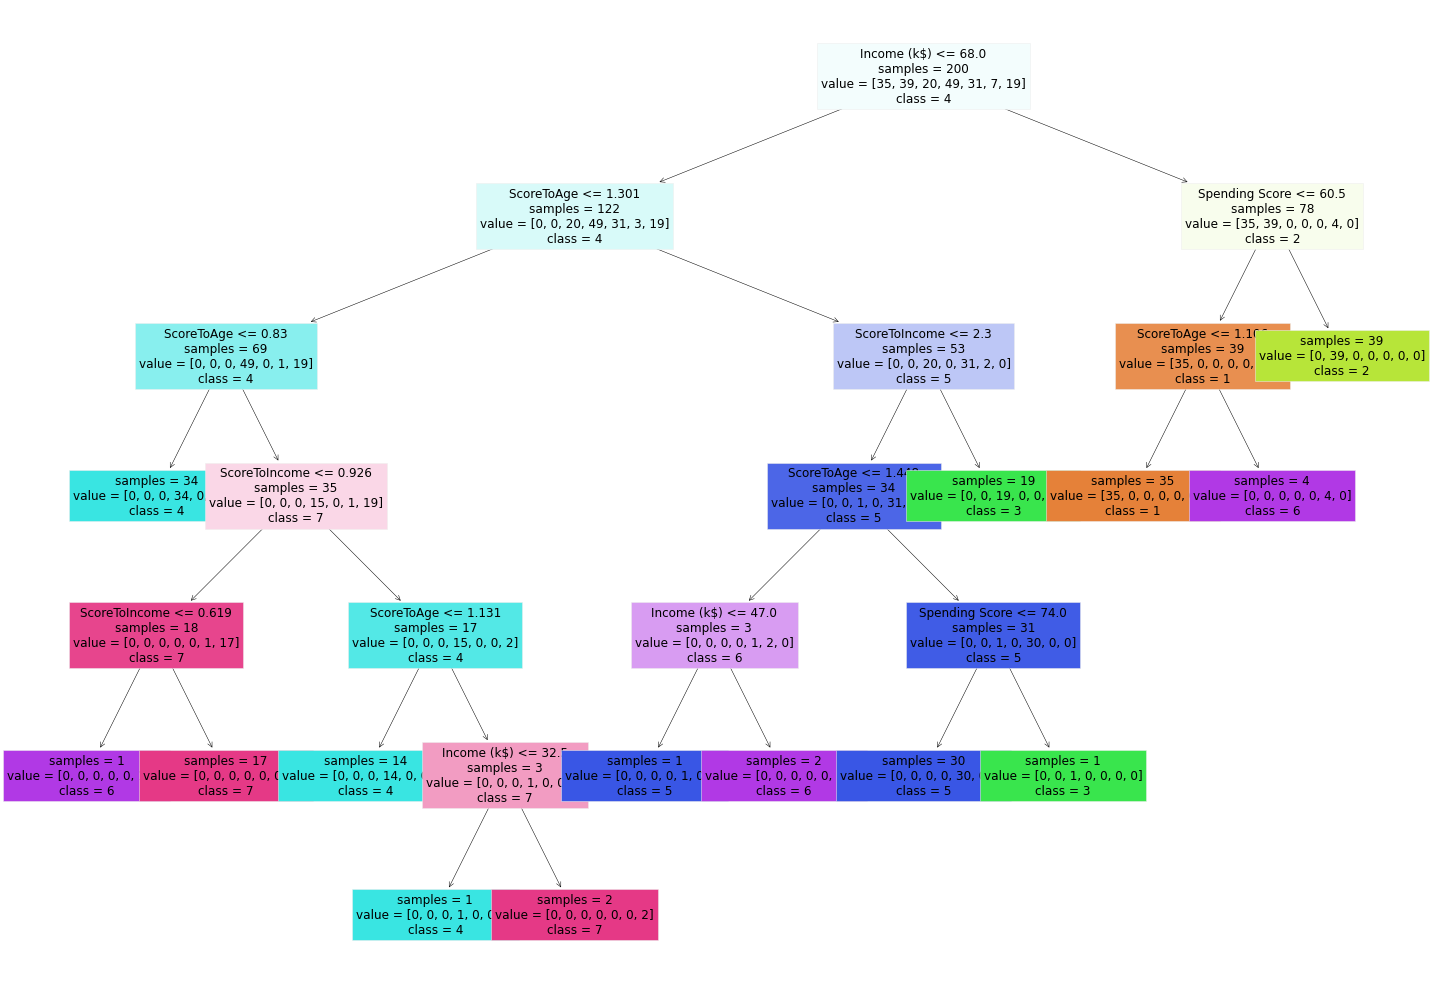

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(25, 18))

plot_tree(dtc, feature_names=df_gmm_ht.drop('ClusterGroup', axis=1).columns.to_list(), class_names=list(np.unique(df_gmm_ht['ClusterGroup'].values.astype(str))), impurity=False,
          filled=True, ax=ax, fontsize=12)
plt.show()


#### Cluster Interpretation - GMM
__Cluster 1: Old People with moderate income and likely close to retirement__<br/>

> This cluster focus on old people who has a moderate income of 50k and a moderate spending score. Slightly lower than mean income and a close to 1 ratio of score to income and low score to age

> Overall, this is the group that shooping mall maybe can have some form of things that are more suitable for old age to entice them to buy
>
>__Cluster 2: Young working adults who has work for quite some time__<br/>

> This cluster contains customer at around 32 years old with  high income in comparison, they have a high spending score with a high score to age ratio and close to 1 score to income ratio

> Overall, this is the group that shooping mall can target to entice them to spend even more


__Cluster 3: Young adults who has moderate income__<br/>

> This cluster is similar to cluster 2, but they do have a higher income and a lower spending score and a smaller score to income ratio 
> Overall, this is the group that shooping mall can continue to target and utilise vouchers to attract them as a form of marketing strategy

__Cluster 4: High Inome middle age Customers (Save Type)__<br/>

> Spenders in this grop has a relatively high income of 88k but with a low spending score of 17, in addition, they are in the high ses with comparison to mean with a relatively low score to income ratio and score to age ratio

> Overall, the are considered as the high income but thrifty maybe shooping mall can offer vouchers to entice them

__Cluster 5: Middle Age adults who are low income__<br/>

> This cluster contains middle age with a low income with a low spending score and is considered low ses but have a relative close to 1 score to income ratio 

> Overall, this is the group that may need to most help and therefore provide them with grants or monthly grocery vouchers

__Cluster 6: Middle Age adults with moderate income__<br/>

> This cluster contains middle age audlts similar to cluster 1, but this group has a closer to mean income and and a higher than 1 score to age and lower than one score to income

> Overall, this is the group that shooping mall can target with buy 1 free 1 sales


__Cluster 7: Young adults who just come out from university and have not found job__<br/>

> This cluster contains relatively young people average age 24 years old with  low income in comparison, they have a high spending score with a high score to age ratio and high score to income ratio

> Overall, this is the group that  shooping mall can continue to target and utilise vouchers to attract them as a form of marketing strategy






> 



<a class="anchor" id="15"></a>
## <font color='#71a1e3'> __Recommendations__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

### What can the shopping malls do ?

From our clusters, we notice that there are two key groups known as `middle age` and `young adults` but contains the following differences
- They have different income
- They have different spending socre

Therefore, what can we do?
-  Shopping malls can provide monthly offers 
-  Shopping malls can have tierd membership to enable those of a lower income to enjoy more benefits
-  Shopping malls can integrate online stores into their ecosystem as more people are shopping online
  
Overall, shopping mall could consider more advertisment on social media or bigger sales event 

<a class="anchor" id="16"></a>
## <font color='#71a1e3'> __Conculsion__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Above is the full process of clustering, and cluster out different groups to provide stores and idea of what to do next following this tough covid period